<img src='https://www.reliance-project.eu/wp-content/uploads/2021/03/Asset-8mdpi.svg' alt='Layout' align='left' width='25%'></img> 
<img src='https://media-exp1.licdn.com/dms/image/C560BAQFFDze0s3l-pQ/company-logo_200_200/0?e=2159024400&v=beta&t=jG_sh9NpwE6yc2TspIcL2YUR2X7OBzTrRSu6w7sNYtc' alt='Layout' align='right' width='10%'></img> 
<br>
<br>
<br>
<br>
<br>

# NO2 over Italy with CAMS European air quality analysis using RELIANCE services

## Analysis over a particular country and a town in the country of interest

<div class="alert alert-success alert-info">
<b>How to discover RELIANCE datacube resources (spatial & temporal search and subsetting), share resources using EGI datahub, and use RoHub to create FAIR digital Objects</b></div>

This notebook shows how to discover and access the [Copernicus Atmosphere Monitoring](https://ads.atmosphere.copernicus.eu/#!/home) products available in the **RELIANCE** datacube resources, by using the functionalities provided in the <font color='blue'> **Adam API** </font>. The process is structured in 7 steps, including example of data analysis and visualization with the Python libraries installed in the Jupyter environment as well as the creation of a FAIR digital object on [RoHUB](https://reliance.rohub.org/) where all the resources used and generated in this notebook are aggregated.

You can customize this Jupyter notebook, for instance by updating the content of [Data Management](#1.Data_Management) section.

- [1. Data Management](#1_Data_Management)
- [2. Authentication](#2_Authentication)
- [3. Datasets Discovery](#3_Datasets_Discovery)
- [4. Products Discovery](#4_Products_Discovery)
- [5. Data Access](#5_Data_Access)
- [6. Data Analysis and Visualizarion](#6_Data_Analysis_Visualization)
- [7. Create Research Object and Share my work](#7_rohub)

<a id=1_Data_Management></a>
## **Step 1: Data Management** 

### Authors 
- Make sure you first register to RoHub at [https://reliance.rohub.org/](https://reliance.rohub.org/). 
- We recommend you use your [ORCID](https://orcid.org/) identifier to login and register to EOSC services.
- In the list of authors, add any co-authors using the email address they used when they registered in RoHub.

In [1]:
author_emails = ['annefou@geo.uio.no', 'jeani@uio.no']

### Add the University of Olso and the Nordic e-Infrastructure Collaboration as publishers 

In [2]:
UiO_organization = {"org_id":"http://www.uio.no/english/", 
                     "display_name": "University of Oslo", 
                     "agent_type": "organization",
                     "ror_identifier":"01xtthb56",
                     "organization_url": "http://www.uio.no/english/"}

In [3]:
NeIC_organization = {"org_id":"https://neic.no/",
                    "display_name": "Nordic e-Infrastructure Collaboration", 
                     "agent_type": "organization",
                    "ror_identifier":"04jcwf484",
                    "organization_url": "https://neic.no/"}

In [4]:
list_publishers = [UiO_organization, NeIC_organization]

In [5]:
list_copyright_holders = [UiO_organization]

### Add the funding
- if your work is not funded set 
```
funded_by = {}
```

In [6]:
funded_by = {
"grant_id": "101017502",
"grant_Name": "RELIANCE",
"grant_title": "Research Lifecycle Management for Earth Science Communities and Copernicus Users",
"funder_name": "European Commission",
"funder_doi": "10.13039/501100000781",
}

### Choose a license for your FAIR digital object

In [7]:
import rohub

In [8]:
licenses = rohub.list_available_licenses()
# Update line below to print more licenses
licenses[0:5]

['0BSD', 'AAL', 'ADSL', 'AFL-1.1', 'AFL-1.2']

In [9]:
license = 'MIT'

### Organize my data using EGI datahub
- Define a prefix for my project (you may need to adjust it for your own usage on your infrastructure). 
   - `input` folder where all the data used as input to my Jupyter Notebook is stored (and eventually shared)
   - `output` folder where all the results to keep are stored
   - `tool` folder where all the tools, including this Jupyter Notebook will be copied for sharing
- Create all corresponding folders

### Import Python packages

In [10]:
import os
import warnings
import pathlib

In [11]:
warnings.filterwarnings('ignore')

## Initialization
- Choose a country and add its name and country code
- Choose the variable to analyze (PM10, PM25, NO2, O3, etc.)
- Choose the area for your analysis

### Choose the country of interest

In [12]:
country_code = 'IT' 
country_fullname = "Italy"
town_fullname = 'Venice'
town_coordinates = {'latitude': 45.4408, 'longitude': 12.3155}
variable_name = 'NO2'
variable_unit = 'kg m-3'
variable_long_name = 'Nitrogen Dioxide'

### Geojson for selecting data from ADAM
- The geometry field is extracted from a GeoJSON file, retrieving the value of the "feature" element.
- To create a geojson file for the area of interest, you can use https://geojson.io/
- Then paste the result below in the geojson variable

In [13]:
geojson = """{ "type": "Feature", "properties": { }, 
            "geometry": {"type":"MultiPolygon",
                         "coordinates":[[[[12.62126712300005,35.49233633000007],[12.611094597000118,35.489243882],[12.603037957000083,35.491400458],[12.598317905000073,35.494330145],[12.59392337300008,35.49445221600008],[12.55567467500012,35.50804271000014],[12.536143425000148,35.51260000200007],[12.526133660000085,35.51666901200004],[12.533864780000071,35.5216332050001],[12.55567467500012,35.521226304],[12.566905144000115,35.51902903900019],[12.612803582000112,35.515326239000146],[12.62126712300005,35.513373114],[12.6237085300001,35.51190827000015],[12.621755405000044,35.50975169500005],[12.62126712300005,35.508246161],[12.623871290000068,35.50161367400012],[12.62126712300005,35.49233633000007]]],[[[12.872569207000083,35.85228099200016],[12.856944207000112,35.85228099200016],[12.850922071000099,35.855902411000116],[12.845876498000079,35.86269765800016],[12.847015821000099,35.868312893000066],[12.853526238000114,35.87124258000007],[12.859873894000115,35.87221914300015],[12.867035352000073,35.87225983300014],[12.874034050000148,35.86644114799999],[12.876719597000116,35.855861721000124],[12.872569207000083,35.85228099200016]]],[[[11.98064212300011,36.82709381700009],[11.987315300000148,36.82416413000006],[11.992930535000056,36.825384833000086],[11.99952233200014,36.83592357000013],[12.037608269000115,36.806626695000105],[12.051524285000113,36.790350653000175],[12.053477410000141,36.76764557500003],[12.030609571000127,36.74135976800004],[11.996104363000114,36.74494049700009],[11.96119225400011,36.765204169000086],[11.937347852000128,36.788763739000146],[11.932953321000127,36.79564036700005],[11.924978061000104,36.81195709800009],[11.922211134000122,36.82835521],[11.934336785000113,36.83592357000013],[11.938812696000099,36.837062893000066],[11.946136915000096,36.841701565],[11.95134524800008,36.84275950700005],[11.957692905000016,36.840562242000075],[11.967295769000089,36.83120351800012],[11.971446160000141,36.82908763200011],[11.98064212300011,36.82709381700009]]],[[[12.321299675000061,37.940497137000094],[12.336761915000094,37.93305084800012],[12.354665561000045,37.926988023000135],[12.368825717000078,37.92523834800012],[12.357676629000139,37.91404857000013],[12.342133009000065,37.91323476800004],[12.326182488000143,37.918361721000124],[12.314219597000118,37.92523834800012],[12.299652540000096,37.91925690300003],[12.287771030000043,37.9215355490001],[12.278656446000127,37.92918528900013],[12.27320397200009,37.93952057500003],[12.286957227000128,37.93854401200014],[12.29704837300008,37.94131094000012],[12.305430535000141,37.94497304900007],[12.314219597000118,37.94635651200015],[12.321299675000061,37.940497137000094]]],[[[12.077891472000088,37.960109768000066],[12.079274936000076,37.950262762000065],[12.06478925900012,37.95083242400001],[12.047618035000113,37.96076080900012],[12.037119988000141,37.97370026200012],[12.030446811000076,37.98436107000005],[12.035980665000096,37.991034247000115],[12.053558790000123,37.99241771],[12.064463738000114,37.98623281500012],[12.072276238000113,37.967922268000066],[12.077891472000088,37.960109768000066]]],[[[15.642425977000073,38.262274481000034],[15.63445071700005,38.26093170800005],[15.624278191000087,38.261664130000085],[15.583750847000147,38.240423895],[15.569672071000127,38.22695547100001],[15.562998894000145,38.21430084800015],[15.559906446000069,38.19977448100009],[15.575938347000063,38.20018138200011],[15.527028842000076,38.136786200000174],[15.500336134000065,38.08494700700008],[15.392588738000114,37.976141669000135],[15.302744988000086,37.86440664300004],[15.283457879000139,37.832953192],[15.266286655000044,37.81191640800016],[15.241221550000118,37.79555898600013],[15.213063998000052,37.76146067900014],[15.20655358200014,37.74774811400012],[15.208262566000142,37.73704661700019],[15.218597852000073,37.718085028000175],[15.220225457000081,37.706732489],[15.216075066000144,37.696722723000114],[15.202159050000061,37.68537018400014],[15.199066602000103,37.675726630000085],[15.196787957000112,37.655096747000144],[15.184580925000148,37.62579987200002],[15.178558790000126,37.604315497000115],[15.163828972000147,37.567694403000175],[15.115896030000044,37.52228424700009],[15.096690300000091,37.49445221600003],[15.091563347000147,37.47748444200006],[15.08952884200005,37.459458726000136],[15.092051629000137,37.360541083000115],[15.096690300000091,37.34369538000011],[15.103526238000086,37.329779364000146],[15.110687696000127,37.32184479400017],[15.180023634000094,37.29075755400008],[15.217458530000043,37.28497955900012],[15.236664259000095,37.274725653000175],[15.251963738000143,37.25771719000012],[15.26124108200011,37.23383209800015],[15.244883660000083,37.24616120000009],[15.235606316000116,37.24192942900008],[15.228851759000094,37.23029205900015],[15.220225457000081,37.220160223],[15.221690300000146,37.237453518],[15.21583092500012,37.244696356000034],[15.205414259000122,37.244696356000034],[15.19288170700011,37.23997630400011],[15.199066602000103,37.22760651200018],[15.1834416020001,37.207464911000145],[15.194672071000097,37.17633698100015],[15.216481967000048,37.15521881700015],[15.233246290000066,37.164862372000115],[15.247569207000055,37.158677476000136],[15.247569207000055,37.15184153900013],[15.229177280000016,37.14964427300013],[15.231781446000127,37.13491445500013],[15.246592644000089,37.118231512000094],[15.264659050000118,37.11029694200012],[15.288828972000116,37.10838450700008],[15.303233269000087,37.101223049000126],[15.307871941000116,37.086655992000104],[15.302744988000086,37.062486070000105],[15.287933790000125,37.0689964860001],[15.281993035000085,37.06085846600017],[15.283702019000087,37.048407294000135],[15.291840040000123,37.04197825700005],[15.312266472000088,37.04401276200018],[15.321055535000141,37.04022858300006],[15.329437696000126,37.027736721000124],[15.33236738400012,37.011623440000065],[15.324717644000115,37.008490302],[15.314219597000147,37.01243724200016],[15.308929884000063,37.01776764500014],[15.303396030000043,37.01618073100012],[15.268077019000117,37.00043366100006],[15.27491295700014,36.99359772300015],[15.26612389400006,36.989406643],[15.263845248000107,36.98712799700006],[15.268077019000117,36.980536200000145],[15.268077019000117,36.973089911],[15.244476759000092,36.972072658000044],[15.22673587300008,36.96478913000011],[15.211680535000085,36.956488348000114],[15.196055535000083,36.95262278900013],[15.174652540000125,36.944077867000104],[15.15837649800011,36.924221096],[15.107676629000139,36.82013580900018],[15.106618686000077,36.80857982000008],[15.094004754000109,36.79954661700005],[15.098887566000085,36.779445705000015],[15.117198113000143,36.74713776200018],[15.134938998000022,36.68768952000012],[15.134287957000083,36.67519765800013],[15.114512566000142,36.65989817900008],[15.09392337300011,36.65493398600001],[15.073578321000127,36.65912506700015],[15.055186394000087,36.67145416900008],[15.04070071700005,36.68768952000012],[15.033050977000102,36.69391510600009],[15.021006707000083,36.69936758000013],[15.007172071000099,36.702785549000126],[14.997813347000147,36.70221588700018],[14.99366295700011,36.695949611000046],[14.982432488000114,36.68886953300016],[14.957286004000137,36.69782135600009],[14.9186304050001,36.719875393000095],[14.882172071000127,36.73065827],[14.846853061000104,36.72626373900003],[14.780772332000083,36.69936758000013],[14.776133660000054,36.70770905200003],[14.773448113000084,36.71002838700015],[14.760915561000076,36.70620351800015],[14.744313998000024,36.71914297100015],[14.684580925000148,36.726019598000065],[14.671641472000145,36.74371979400017],[14.658946160000083,36.75381094000012],[14.60010826900009,36.7721214860001],[14.582204623000052,36.781317450000174],[14.565928582000112,36.77830638200008],[14.487315300000091,36.793361721000096],[14.475759311000077,36.804917710000105],[14.394541863000084,36.94501373900009],[14.369883660000085,36.973089911],[14.27881920700014,37.04401276200018],[14.208506707000112,37.08112213700018],[14.126312696000042,37.11225006700009],[14.088633660000085,37.11774323100011],[13.976328972000147,37.11029694200012],[13.967295769000145,37.108221747000115],[13.948578321000069,37.098822333],[13.93848717500012,37.095933335000055],[13.89437910200013,37.100816148000135],[13.832692905000101,37.13955312700007],[13.794606967000107,37.15184153900013],[13.75163821700005,37.159002997000144],[13.715830925000148,37.1713727890001],[13.683441602000128,37.18935781500012],[13.598806186000047,37.25674062700013],[13.569183790000096,37.273504950000145],[13.534434441000116,37.28217194200006],[13.488617384000122,37.2884789080001],[13.45264733200014,37.298814195000105],[13.42156009200005,37.31439850499999],[13.372243686000076,37.34613678600006],[13.329600457000112,37.366278387000094],[13.311289910000056,37.38084544500013],[13.302012566000116,37.385728257],[13.28923587300008,37.38914622600011],[13.278005405000071,37.39370351800015],[13.253265821000099,37.43178945500012],[13.247325066000059,37.43593984600007],[13.225352410000141,37.44603099200005],[13.214040561000076,37.45807526200015],[13.20606530000012,37.46393463700009],[13.194590691000085,37.466538804],[13.189219597000118,37.46971263200005],[13.179372592000107,37.48383209800009],[13.174082879000109,37.487005927000055],[13.051524285000085,37.500677802],[13.036794467000078,37.49485911700005],[13.026377800000091,37.49323151200012],[13.016856316000116,37.4975446640001],[13.010427280000101,37.50690338700014],[13.004161004000139,37.527085679],[13.000010613000114,37.53546784100014],[12.974131707000083,37.557440497000144],[12.942637566000087,37.5685082050001],[12.862152540000096,37.576402085000076],[12.780935092000107,37.57420482],[12.697764519000145,37.56273021000014],[12.659353061000045,37.565130927000084],[12.636241082000083,37.58222077000012],[12.594737175000091,37.63788483300014],[12.577810092000107,37.65200429900007],[12.56348717500012,37.65778229400003],[12.523610873000052,37.658351955],[12.506195509000092,37.665513414000046],[12.489024285000141,37.68268463700015],[12.474375847000147,37.70294830900018],[12.46501712300011,37.71979401200018],[12.460459832000083,37.734605210000055],[12.45915774800008,37.74774811400012],[12.456309441000116,37.75975169500013],[12.448008660000141,37.77130768400014],[12.436289910000141,37.78314850500011],[12.427012566000114,37.797023830000015],[12.427419467000107,37.809271552000084],[12.444590691000144,37.81598541900003],[12.446055535000113,37.811835028000175],[12.460459832000083,37.819037177000105],[12.46501712300011,37.822821356000034],[12.463063998000079,37.82575104400014],[12.470225457000112,37.853420315000065],[12.472422722000088,37.854193427000084],[12.477712436000074,37.87254466400013],[12.478688998000052,37.881170966000056],[12.47673587300011,37.88593170800014],[12.467784050000061,37.89712148600013],[12.46501712300011,37.90599192899999],[12.464121941000116,37.91290924700008],[12.464528842000021,37.91412995000012],[12.467051629000139,37.91616445500013],[12.49048912900011,37.95400625200007],[12.496592644000117,37.98061758000004],[12.50294030000012,37.9970563820001],[12.504161004000139,38.011216539000046],[12.492930535000141,38.021429755000085],[12.523448113000086,38.03143952000006],[12.549652540000123,38.05483633000013],[12.57634524800005,38.07172272300012],[12.60840905000012,38.06240469],[12.638682488000114,38.07949453300013],[12.651621941000114,38.09149811400005],[12.6569116550001,38.107367255],[12.66244550900012,38.11627838700004],[12.676036004000082,38.11587148600002],[12.691905144000115,38.11212799700009],[12.704600457000083,38.11082591400019],[12.725352410000056,38.125921942],[12.723968946000099,38.15033600500014],[12.719899936000047,38.17548248900012],[12.73178144600007,38.192775783000044],[12.737803582000083,38.18097565300015],[12.749359571000099,38.182074286],[12.760915561000045,38.18097565300015],[12.766123894000117,38.16266510600009],[12.790782097000118,38.11709219000012],[12.818369988000143,38.07794830900009],[12.828786655000043,38.06989166900014],[12.856944207000112,38.05857982],[12.868907097000147,38.05133698100015],[12.869639519000089,38.042547919000086],[12.901133660000085,38.02806224200005],[12.944183790000123,38.032863674000126],[13.027354363000086,38.06240469],[13.061371290000096,38.0834821640001],[13.069672071000069,38.09113190300015],[13.071299675000091,38.09552643400003],[13.069590691000085,38.10146719000014],[13.06820722700013,38.113959052000055],[13.06617272200009,38.12303294500008],[13.056813998000052,38.13271719000012],[13.054698113000143,38.141831773000106],[13.089366082000112,38.166001695000105],[13.083750847000118,38.174709377],[13.089610222000145,38.18333567900011],[13.100922071000042,38.19009023600013],[13.112478061000076,38.192775783000044],[13.12240644600007,38.19098541900006],[13.156993035000085,38.17967357000005],[13.179372592000107,38.17621491100005],[13.20720462300005,38.17609284100008],[13.230316602000102,38.184637762000094],[13.239024285000085,38.20701732000013],[13.254405144000115,38.20254140800016],[13.265961134000065,38.20526764500012],[13.277028842000107,38.210435289000046],[13.296641472000147,38.214422919000114],[13.310231967000107,38.21954987200003],[13.318125847000088,38.220648505000085],[13.32325280000009,38.21796295799999],[13.325043165000096,38.21165599200005],[13.326019727000071,38.204779364000146],[13.32837975400011,38.20018138200011],[13.366221550000148,38.17967357000005],[13.371918165000123,38.17279694200015],[13.37330162900011,38.140692450000174],[13.376719597000118,38.13129303600006],[13.391368035000141,38.103176174000154],[13.513519727000073,38.11054108300006],[13.541270379000139,38.09406159100017],[13.539317254000082,38.076849677000055],[13.54086347700013,38.067531643],[13.547373894000115,38.05621979400003],[13.557465040000096,38.04913971600017],[13.587087436000047,38.039129950000174],[13.62240644600007,38.01520416900003],[13.651133660000113,38.00096263200011],[13.697764519000117,37.99359772300012],[13.711924675000148,37.987941799000126],[13.707774285000113,37.98509349200019],[13.70728600400011,37.984035549000126],[13.705088738000114,37.98045482000008],[13.72673587300011,37.98090241100006],[13.790782097000088,37.97361888200013],[13.812673373000052,37.97793203300013],[13.857188347000116,37.9967308610001],[13.898285352000128,38.00446198100009],[13.91228274800008,38.01264069200003],[13.924815300000091,38.02195872600005],[13.93848717500012,38.02887604400014],[14.007172071000127,38.038275458000086],[14.020518425000118,38.04938385600012],[14.062510613000114,38.03021881700015],[14.083262566000114,38.02383047100012],[14.106293165000094,38.021429755000085],[14.120941602000102,38.022609768],[14.151377800000148,38.02887604400014],[14.273203972000145,38.015122789000046],[14.331228061000047,38.01801178600005],[14.384613477000073,38.02952708500002],[14.431895379000139,38.04938385600012],[14.464121941000085,38.037176825000024],[14.511729363000143,38.044378973000065],[14.634613477000102,38.08148834800009],[14.667735222000147,38.099188544000086],[14.6959741550001,38.12103913000011],[14.73373457100007,38.15761953300016],[14.744802280000101,38.16136302299999],[14.777598504000112,38.15924713700017],[14.798106316000089,38.16034577000012],[14.87403405000012,38.17568594000009],[14.88803144600007,38.18260325700008],[14.897471550000091,38.185939846],[14.907074415000068,38.18768952],[14.935313347000118,38.185939846],[14.944997592000078,38.18178945500007],[14.96306399800011,38.16339752800003],[14.969737175000146,38.15924713700017],[14.98178144600007,38.15827057500012],[15.007334832000138,38.151800848],[15.039073113000116,38.15330638200005],[15.04900149800011,38.151800848],[15.053070509000065,38.14838288],[15.063243035000111,38.13568756700012],[15.068695509000065,38.13129303600006],[15.087901238000113,38.12824127800015],[15.105316602000073,38.13349030200013],[15.122569207000081,38.141058661],[15.177419467000107,38.156317450000145],[15.20329837300011,38.18329498900012],[15.240733269000145,38.24115631700012],[15.237640821000069,38.248846747000144],[15.236094597000116,38.25104401200004],[15.2369897800001,38.25348541900017],[15.240733269000145,38.261664130000085],[15.237152540000068,38.264797268000144],[15.24317467500009,38.264797268000144],[15.246348504000139,38.25433991100009],[15.240733269000145,38.230292059000035],[15.245371941000087,38.21723053600006],[15.257578972000145,38.21019114799999],[15.274180535000113,38.20750560100011],[15.291840040000123,38.20701732000013],[15.321055535000141,38.210882880000135],[15.399668816000144,38.232570705000015],[15.421885613000114,38.244574286000145],[15.43376712300008,38.25315989800005],[15.47291100400011,38.267808335000055],[15.512868686000074,38.29759349200016],[15.528656446000097,38.302639065],[15.559255405000044,38.300116278000175],[15.615977410000113,38.28021881700009],[15.651621941000146,38.27529531500012],[15.648285352000132,38.266750393],[15.642425977000073,38.262274481000034]]],[[[14.998545769000089,38.371039130000085],[14.986827019000115,38.36408112200017],[14.9635522800001,38.381659247000115],[14.948252800000118,38.39642975499999],[14.945323113000114,38.41225820500013],[14.958832227000071,38.43292877800015],[14.966319207000138,38.43292877800015],[14.966319207000138,38.41868724200005],[14.982432488000114,38.412420966000084],[14.99366295700011,38.403021552000084],[15.001719597000147,38.3912621110001],[15.007334832000138,38.37767161700013],[14.998545769000089,38.371039130000085]]],[[[14.966319207000138,38.45343659100011],[14.94874108200011,38.450913804],[14.93458092500009,38.45864492400009],[14.921560092000107,38.46881745000006],[14.907725457000112,38.47394440300015],[14.89942467500012,38.48167552300008],[14.900645379000139,38.498683986000124],[14.90967858200014,38.51532623900009],[14.924815300000146,38.522365627000156],[14.957855665000094,38.522040106000034],[14.966075066000116,38.51626211100016],[14.958832227000071,38.501857815],[14.965505405000043,38.49754466400019],[14.97413170700014,38.490057684000035],[14.979340040000123,38.487534898000106],[14.979340040000123,38.48139069200012],[14.952647332000112,38.48139069200012],[14.957855665000094,38.46954987200017],[14.961192254000137,38.46499258000013],[14.966319207000138,38.460882880000085],[14.966319207000138,38.45343659100011]]],[[[14.360850457000081,38.53904857],[14.346446160000113,38.53514232],[14.342784050000146,38.547267971000096],[14.357188347000116,38.55121491100009],[14.360850457000081,38.53904857]]],[[[14.863291863000084,38.549017645000085],[14.861664259000063,38.53929271000013],[14.82398522200009,38.55182526200004],[14.793793165000068,38.57160065300015],[14.814952019000089,38.583807684000035],[14.85141035200013,38.58490631700009],[14.866953972000147,38.58112213700015],[14.876963738000114,38.56952545800014],[14.871918165000094,38.56525299700003],[14.86890709700009,38.56049225500011],[14.863291863000084,38.549017645000085]]],[[[14.585459832000081,38.55744049700003],[14.573578321000127,38.556545315000115],[14.551605665000123,38.56159088700015],[14.54371178500014,38.57453034100017],[14.54249108200014,38.58685944200012],[14.54623457100007,38.58795807500017],[14.563975457000053,38.58454010600015],[14.576019727000071,38.57664622599999],[14.579600457000138,38.56614817900011],[14.585215691000144,38.560980536000116],[14.585459832000081,38.55744049700003]]],[[[13.176768425000091,38.693019924000154],[13.165212436000074,38.69106679900001],[13.153493686000074,38.69476959800015],[13.153086785000085,38.702297268],[13.157888217000078,38.709865627000156],[13.169281446000127,38.71727122600005],[13.18572024800011,38.71751536700019],[13.195974155000044,38.711493231000176],[13.19743899800011,38.70831940300012],[13.176768425000091,38.693019924000154]]],[[[15.224619988000084,38.776800848000065],[15.217458530000043,38.77301666900014],[15.206065300000148,38.775213934000035],[15.187022332000083,38.78900788000014],[15.187022332000083,38.792710679],[15.19410241000014,38.79808177300004],[15.203623894000117,38.80158112200003],[15.208750847000147,38.805894273000135],[15.212087436000076,38.81045156500009],[15.218597852000073,38.81195709800012],[15.227793816000142,38.81028880400011],[15.234629754000137,38.80780670799999],[15.239268425000091,38.80402252800015],[15.237478061000104,38.79596588700004],[15.232432488000057,38.78929271000008],[15.229665561000104,38.783026434000035],[15.224619988000084,38.776800848000065]]],[[[8.36036217500012,39.11815013200008],[8.385915561000104,39.105047919000114],[8.417653842000078,39.10659414300015],[8.444590691000144,39.10272858300014],[8.455902540000125,39.07355377800008],[8.45801842500012,39.06806061400006],[8.463145379000139,39.065252997000115],[8.469899936000076,39.065659898000106],[8.476410352000073,39.069769598000065],[8.477305535000056,39.07070547100015],[8.479177280000043,39.07221100499999],[8.48389733200014,39.069769598000065],[8.464040561000047,39.05654531500012],[8.45932050900012,39.049790757],[8.463389519000089,39.04246653900018],[8.453949415000068,39.02814362200009],[8.446543816000087,38.99433014500012],[8.437022332000083,38.96718984600001],[8.432465040000125,38.96283600500011],[8.421885613000086,38.96051666900014],[8.409841342000078,38.961818752000156],[8.406016472000147,38.96694570500016],[8.405039910000085,38.97402578300004],[8.40137780000012,38.98102448100009],[8.364919467000078,39.02948639500009],[8.349294467000078,39.062160549000126],[8.353526238000113,39.083441473],[8.353526238000113,39.09088776200018],[8.346039259000037,39.09088776200018],[8.346039259000037,39.09772370000009],[8.36036217500012,39.11815013200008]]],[[[8.305837436000047,39.10455963700012],[8.290049675000091,39.09882233300014],[8.269379102000073,39.100165106000034],[8.254730665000068,39.10712311400012],[8.257334832000083,39.11815013200008],[8.257334832000083,39.124416408000016],[8.232676629000082,39.144110419000135],[8.224619988000143,39.15704987200017],[8.229991082000112,39.17279694200012],[8.245290561000076,39.18097565300003],[8.290293816000142,39.188421942],[8.305837436000047,39.193304755000085],[8.30632571700005,39.1607933610001],[8.312022332000112,39.120306708000086],[8.305837436000047,39.10455963700012]]],[[[13.95866946700005,40.711818752000156],[13.944672071000099,40.701605536000116],[13.934825066000142,40.70563385600009],[13.919769727000128,40.70449453300016],[13.903493686000104,40.70001862200009],[13.890147332000112,40.694159247000144],[13.882009311000076,40.69953034100011],[13.859711134000063,40.70774974200019],[13.849131707000083,40.71527741100006],[13.856130405000073,40.73484935100013],[13.86150149800005,40.744045315],[13.87012780000012,40.748724677000105],[13.867198113000114,40.752630927000105],[13.86280358200014,40.762396552000055],[13.883148634000122,40.762396552000055],[13.94629967500012,40.74518463700004],[13.965830925000091,40.735052802000084],[13.962657097000118,40.728949286],[13.962412957000083,40.723130601000136],[13.965830925000091,40.71527741100006],[13.95866946700005,40.711818752000156]]],[[[13.426931186000104,40.79083893400014],[13.414724155000043,40.785874742000104],[13.418955925000148,40.795599677000084],[13.424164259000037,40.800238348],[13.431976759000122,40.80145905200011],[13.426931186000104,40.79083893400014]]],[[[8.332367384000094,41.105658270000035],[8.34197024800008,41.09784577000012],[8.344737175000148,41.08624909100011],[8.34131920700014,41.07412344],[8.332367384000094,41.064642645],[8.274750196000127,41.05727773600002],[8.251149936000104,41.04376862200003],[8.250987175000148,41.016099351000136],[8.246429884000092,40.99363841400004],[8.209646030000101,40.995794989000146],[8.217621290000068,41.005031643],[8.22169030000012,41.014390367000125],[8.223155144000089,41.02399323100012],[8.223155144000089,41.03363678600009],[8.228851759000065,41.041734117000104],[8.241384311000076,41.05206940300011],[8.260752800000091,41.064642645],[8.275645379000139,41.06976959800012],[8.277842644000117,41.081732489000146],[8.275645379000139,41.09540436400009],[8.277842644000117,41.105658270000035],[8.284353061000104,41.10687897300012],[8.302093946000099,41.10504791900014],[8.305837436000047,41.10907623900012],[8.30795332100007,41.11383698100012],[8.313324415000125,41.11859772300012],[8.326182488000143,41.126125393000066],[8.32593834700009,41.118353583000086],[8.32797285200013,41.112494208000115],[8.332367384000094,41.105658270000035]]],[[[9.471039259000094,41.1896019550001],[9.474375847000118,41.18427155200011],[9.47486412900011,41.17926666900017],[9.47038821700005,41.17210521000014],[9.46436608200014,41.172674872000115],[9.45639082100007,41.18065013200005],[9.44874108200014,41.18553294500013],[9.441661004000082,41.183050848],[9.437022332000055,41.185939846000124],[9.447764519000089,41.205064195000105],[9.44353274800005,41.21149323100012],[9.446462436000076,41.22040436400006],[9.453868035000056,41.23395416900003],[9.459971550000148,41.24237702000006],[9.468028191000087,41.24111562700007],[9.474782748000107,41.23607005400013],[9.478363477000102,41.228461005],[9.47950280000012,41.224188544000086],[9.479258660000085,41.21694570500016],[9.471039259000094,41.1896019550001]]],[[[9.435313347000147,41.21702708500014],[9.395274285000113,41.210598049000126],[9.376963738000143,41.213324286],[9.373057488000057,41.221909898000106],[9.373057488000057,41.22988515800016],[9.3776147800001,41.23383209800015],[9.384938998000107,41.23651764500012],[9.391856316000116,41.24070872600005],[9.396250847000088,41.24774811400012],[9.397959832000112,41.256048895],[9.402191602000128,41.25751373900006],[9.40796959700009,41.25812409100003],[9.414235873000052,41.262437242000125],[9.421885613000057,41.260891018000095],[9.427419467000078,41.254095770000056],[9.430511915000066,41.24628327000006],[9.430430535000085,41.23777903900004],[9.429047071000099,41.22939687700007],[9.430918816000085,41.22479889500015],[9.4342554050001,41.220607815],[9.435313347000147,41.21702708500014]]],[[[9.238291863000143,41.24884674700017],[9.246918165000068,41.24774811400012],[9.257823113000143,41.2496605490001],[9.268077019000145,41.236639716000106],[9.267425977000102,41.20197174700003],[9.278330925000091,41.19501373900012],[9.274668816000144,41.199530341000084],[9.273610873000079,41.20514557500009],[9.274912957000083,41.212388414000095],[9.278330925000091,41.221747137000065],[9.285329623000079,41.221747137000065],[9.289317254000139,41.20872630400005],[9.288340691000087,41.20575592700005],[9.285329623000079,41.20123932500009],[9.285329623000079,41.19501373900012],[9.299571160000085,41.196478583],[9.305430535000113,41.197943427000055],[9.312510613000084,41.20123932500009],[9.316579623000052,41.196478583],[9.33301842500012,41.187567450000145],[9.335215691000116,41.21165599199999],[9.352061394000117,41.20726146],[9.388194207000055,41.18073151200004],[9.388194207000055,41.187567450000145],[9.396657748000107,41.18390534100011],[9.40406334700009,41.18170807500012],[9.41228274800008,41.18073151200004],[9.422373894000145,41.18073151200004],[9.422373894000145,41.174505927000084],[9.417002800000091,41.171454169000086],[9.41431725400011,41.16819896000014],[9.412119988000114,41.16453685099999],[9.408702019000117,41.16030508000007],[9.420176629000053,41.15643952000006],[9.426605665000068,41.14923737200003],[9.432790561000047,41.1407738300001],[9.442881707000112,41.1329613300001],[9.437022332000055,41.12543366100014],[9.436778191000116,41.11538320500016],[9.442881707000112,41.09198639500009],[9.45411217500012,41.11196523600016],[9.46045983200014,41.12051015800007],[9.470062696000127,41.126125393000066],[9.466807488000086,41.130682684000114],[9.465098504000082,41.134426174000154],[9.462412957000083,41.13760000200004],[9.45655358200014,41.140366929],[9.469086134000037,41.14618561400012],[9.481455925000091,41.14557526200018],[9.494395379000082,41.14232005400014],[9.50806725400011,41.140366929],[9.513926629000082,41.14350006700006],[9.518402540000125,41.148667710000055],[9.523936394000145,41.14972565300012],[9.53223717500012,41.140366929],[9.52475019600007,41.1329613300001],[9.534353061000047,41.128119208000115],[9.540782097000147,41.122870184000035],[9.546153191000116,41.12091705900018],[9.552744988000086,41.126125393000066],[9.559580925000091,41.126125393000066],[9.561208530000043,41.12181224199999],[9.561778191000087,41.12107982000005],[9.562998894000117,41.121242580000015],[9.566416863000114,41.11933014500014],[9.565114780000016,41.10712311400009],[9.56226647200009,41.09711334800009],[9.556407097000118,41.08783600500014],[9.545909050000148,41.077704169000086],[9.543793165000068,41.08250560100008],[9.540782097000147,41.08734772300015],[9.539073113000143,41.09198639500009],[9.52125084700006,41.031683661000116],[9.51189212300005,41.0162621110001],[9.53223717500012,41.0162621110001],[9.52475019600007,41.030503648000106],[9.543142123000107,41.03693268400012],[9.55420983200014,41.03461334800014],[9.557627800000148,41.02505117400007],[9.552744988000086,41.00946686400009],[9.557790561000104,41.0094261740001],[9.558604363000114,41.01105377800012],[9.558278842000107,41.01361725500011],[9.559580925000091,41.0162621110001],[9.565684441000085,41.01093170800014],[9.56861412900011,41.00950755400008],[9.57325280000012,41.00946686400009],[9.588145379000082,41.020697333000086],[9.615733269000117,41.01959870000003],[9.64429772200009,41.01166413000006],[9.662608269000145,41.002630927000055],[9.651215040000096,40.991115627000035],[9.635996941000116,40.99237702000012],[9.619639519000089,40.99876536700005],[9.604258660000141,41.002630927000055],[9.587575717000107,40.995794989000146],[9.582530144000087,40.979925848],[9.578868035000141,40.96198151200015],[9.566416863000114,40.94863515800016],[9.571136915000125,40.93488190300003],[9.557465040000096,40.93121979400008],[9.51189212300005,40.934312242000075],[9.511241082000083,40.929388739],[9.512543165000096,40.92796458500014],[9.504242384000094,40.926906643000095],[9.51197350400011,40.915187893000095],[9.520030144000145,40.91502513200014],[9.528981967000078,40.91925690300015],[9.539073113000143,40.920640367000125],[9.549327019000089,40.917222398000106],[9.567230665000125,40.90839264500006],[9.57325280000012,40.90639883000013],[9.59278405000012,40.90989817900011],[9.607676629000082,40.917873440000065],[9.622569207000112,40.92377350500003],[9.642100457000112,40.920640367000125],[9.637217644000115,40.91156647300012],[9.631521030000044,40.904852606000176],[9.623871290000125,40.900702216000134],[9.614105665000096,40.89960358299999],[9.614105665000096,40.89337799700006],[9.65007571700005,40.87946198100014],[9.65577233200014,40.87604401200015],[9.657725457000083,40.86395905200005],[9.663259311000104,40.85822174700017],[9.671722852000128,40.85871002800015],[9.683116082000112,40.865423895],[9.689789259000065,40.855861721000124],[9.699392123000052,40.85004303600006],[9.710948113000086,40.846869208],[9.72396894600007,40.84491608300006],[9.691091342000078,40.83624909100014],[9.681000196000099,40.82977936400006],[9.689789259000065,40.81704336100002],[9.689789259000065,40.810777085000055],[9.674489780000101,40.81391022300012],[9.66179446700005,40.80902741100006],[9.65788821700005,40.79987213700018],[9.668793165000125,40.790350653000175],[9.669769727000102,40.80145905200011],[9.675791863000114,40.788641669000164],[9.703949415000096,40.759426174000126],[9.710297071000127,40.74559153900004],[9.714203321000127,40.727240302],[9.74447675900012,40.680487372000115],[9.748301629000109,40.667222397999986],[9.753184441000087,40.60529205900012],[9.756521030000044,40.59516022300015],[9.761566602000073,40.58734772300006],[9.768077019000145,40.58429596600017],[9.781911655000044,40.58197663000003],[9.785817905000043,40.57587311400012],[9.78687584700009,40.56712474200004],[9.792246941000144,40.556952216000084],[9.82056725400011,40.53636302300008],[9.826426629000139,40.52960846600003],[9.826670769000089,40.51959870000006],[9.815196160000141,40.50250885600009],[9.81218509200005,40.49237702000015],[9.808767123000052,40.47077057500006],[9.800303582000083,40.45551178600009],[9.77808678500014,40.4272321640001],[9.761729363000113,40.390692450000174],[9.74935957100007,40.377264716000084],[9.727386915000068,40.372015692],[9.71241295700014,40.366400458],[9.700856967000107,40.352972723],[9.683116082000112,40.32420482000008],[9.67017662900011,40.31268952000012],[9.64551842500012,40.29608795800006],[9.63461347700013,40.28261953300007],[9.626149936000104,40.263088283000016],[9.624847852000102,40.24774811400006],[9.62907962300011,40.20555247600011],[9.631114129000139,40.19619375200009],[9.654633009000092,40.14459870000003],[9.665049675000091,40.13157786700005],[9.679698113000114,40.126166083],[9.68783613400012,40.12067291900014],[9.710215691000142,40.0963402360001],[9.73226972700013,40.08392975500006],[9.7303166020001,40.06854889500012],[9.693369988000141,39.99290599200013],[9.687266472000147,39.96116771000008],[9.696625196000099,39.933783270000035],[9.702484571000127,39.93720123900012],[9.709727410000141,39.9403343770001],[9.715668165000068,39.94013092700014],[9.717784050000091,39.933783270000035],[9.71452884200005,39.924505927000055],[9.708181186000104,39.922186591000084],[9.701426629000082,39.92206452000012],[9.696625196000099,39.91950104400003],[9.689463738000143,39.906561591000106],[9.684336785000113,39.89423248900006],[9.683848504000139,39.88251373900009],[9.689789259000065,39.871730861000074],[9.683116082000112,39.871730861000074],[9.683116082000112,39.86554596600011],[9.687754754000139,39.86351146000008],[9.691905144000089,39.860052802000084],[9.696625196000099,39.85805898600013],[9.696625196000099,39.85187409100017],[9.684255405000043,39.83991120000003],[9.675547722000147,39.81891510600009],[9.670258009000094,39.793768622000115],[9.668793165000125,39.769273179],[9.669932488000143,39.75657786700013],[9.675059441000087,39.7320824240001],[9.676280144000089,39.71808502800003],[9.67408287900011,39.70799388200008],[9.664805535000141,39.6913923200001],[9.662608269000145,39.67682526200018],[9.660411004000082,39.67072174700008],[9.65577233200014,39.66290924700009],[9.651133660000113,39.652492580000015],[9.648936394000115,39.638983466000056],[9.65577233200014,39.59454987200003],[9.653005405000073,39.566839911000116],[9.628428582000083,39.50177643400009],[9.644867384000063,39.48395416900011],[9.639008009000122,39.45246002800009],[9.614105665000096,39.399359442],[9.60206139400006,39.35565827],[9.600433790000038,39.341009833],[9.603526238000114,39.32623932500012],[9.611582879000082,39.31655508000016],[9.63461347700013,39.30316803600006],[9.63461347700013,39.29694245000009],[9.607269727000071,39.28900788000011],[9.581879102000128,39.266302802],[9.567556186000047,39.23810455900012],[9.57325280000012,39.21381256700012],[9.565603061000104,39.20506419500005],[9.568858269000145,39.19928620000009],[9.576019727000102,39.19391510600003],[9.579925977000102,39.18707916900003],[9.577891472000147,39.179388739],[9.568532748000024,39.15936920800011],[9.566416863000114,39.14923737200017],[9.557790561000104,39.13971588700018],[9.539561394000117,39.134019273000014],[9.522715691000116,39.12490469],[9.518565300000091,39.10455963700012],[9.510752800000091,39.107977606000034],[9.507090691000142,39.11139557500003],[9.507578972000118,39.116359768000095],[9.51189212300005,39.124416408000016],[9.496348504000139,39.13361237200009],[9.480723504000139,39.13556549700006],[9.465342644000117,39.13190338700018],[9.450368686000076,39.124416408000016],[9.442881707000112,39.124416408000016],[9.437998894000145,39.13336823100015],[9.428965691000114,39.13861725500014],[9.408702019000117,39.1461449240001],[9.383474155000073,39.16925690300006],[9.377696160000085,39.17279694200012],[9.367930535000141,39.177150783],[9.345062696000127,39.19643789300015],[9.336680535000085,39.20075104400014],[9.326182488000114,39.20278554900009],[9.312266472000118,39.20791250200009],[9.299571160000085,39.21450429900007],[9.292165561000076,39.22125885600012],[9.285329623000079,39.21381256700012],[9.271250847000118,39.22052643400018],[9.252452019000089,39.22516510600009],[9.21631920700014,39.228013414000046],[9.19743899800011,39.221136786000145],[9.180918816000114,39.20718008000007],[9.169688347000118,39.19334544500007],[9.166026238000084,39.18707916900003],[9.136892123000107,39.19432200700014],[9.11353600400011,39.21149323100014],[9.073008660000113,39.24852122600002],[9.063731316000144,39.243068752000156],[9.055511915000068,39.24754466400013],[9.047536655000101,39.25600820500007],[9.03874759200005,39.262193101000136],[9.024424675000148,39.264837958000115],[9.013926629000082,39.26390208500014],[9.012543165000096,39.260565497000115],[9.025726759000063,39.25600820500007],[9.025726759000063,39.24852122600002],[9.02100670700014,39.24042389500006],[9.026866082000083,39.23574453300015],[9.035166863000143,39.232163804],[9.037852410000141,39.22711823100015],[9.03874759200005,39.228013414000046],[9.050059441000116,39.22565338700009],[9.074961785000141,39.229885158000016],[9.079844597000118,39.22459544500013],[9.079844597000118,39.21653880400002],[9.078949415000125,39.212347723000065],[9.038584832000083,39.17902252800017],[9.026215040000125,39.16522858300008],[9.018321160000141,39.1461449240001],[9.015961134000094,39.123846747000144],[9.018728061000076,39.10394928600005],[9.024587436000104,39.08612702000009],[9.031993035000085,39.069769598000065],[9.037771030000073,39.063666083000086],[9.043793165000068,39.058417059000085],[9.044932488000114,39.051255601000044],[9.029307488000113,39.03025950700011],[9.018321160000141,38.995306708],[9.025726759000063,38.995306708],[9.015147332000083,38.989650783000016],[9.01205488400012,38.99066803600009],[9.004649285000113,38.995306708],[8.996348504000139,38.982814846000096],[8.89470462300008,38.90228913000011],[8.887950066000114,38.89984772300009],[8.877452019000145,38.899074611000074],[8.872406446000127,38.89606354400017],[8.861338738000086,38.882066148000106],[8.853282097000147,38.877997137000065],[8.841481967000078,38.88056061400006],[8.827891472000118,38.88882070500013],[8.805430535000113,38.90595123900009],[8.805430535000113,38.88544342700011],[8.791026238000143,38.90444570500013],[8.76661217500012,38.920396226000136],[8.739512566000087,38.93065013200005],[8.71656334700009,38.93260325700011],[8.694590691000087,38.925238348000036],[8.668793165000068,38.910589911],[8.651621941000114,38.89154694200003],[8.655121290000125,38.871161200000024],[8.640961134000092,38.864325262000115],[8.634776238000114,38.871161200000024],[8.642832879000139,38.889960028000175],[8.633148634000094,38.89557526200018],[8.615570509000065,38.895941473],[8.59986412900011,38.899074611000074],[8.59986412900011,38.90595123900009],[8.61500084700009,38.92300039300012],[8.615489129000082,38.94757721600014],[8.603282097000118,38.96491120000003],[8.580088738000084,38.96051666900014],[8.572276238000086,39.01361725500006],[8.55958092500012,39.05670807500009],[8.55209394600007,39.05670807500009],[8.54428144600007,39.051255601000044],[8.520843946000099,39.06085846600003],[8.504405144000089,39.062933661000145],[8.509043816000116,39.067938544000086],[8.518077019000117,39.083441473],[8.504405144000089,39.09088776200018],[8.482758009000094,39.08038971600011],[8.48210696700005,39.08417389500012],[8.47754967500012,39.090480861000074],[8.473317905000101,39.10736725500006],[8.465098504000082,39.11945221600016],[8.454274936000104,39.12490469],[8.442230665000096,39.11815013200008],[8.437998894000145,39.12848541900017],[8.438649936000104,39.15314362200017],[8.435394727000071,39.16596100500003],[8.428396030000073,39.17316315300003],[8.418793165000096,39.17731354400017],[8.412608269000145,39.17572663000014],[8.415700717000107,39.16596100500003],[8.40951582100007,39.169338283000044],[8.405039910000085,39.17438385600015],[8.402354363000114,39.181341864000146],[8.40137780000012,39.1901716170001],[8.398692254000139,39.20115794500008],[8.392588738000086,39.204046942],[8.385508660000113,39.20441315300011],[8.380137566000142,39.207586981000176],[8.372813347000147,39.222072658000016],[8.371755405000101,39.23061758000013],[8.376719597000147,39.23786041900017],[8.426442905000044,39.283270575000145],[8.432139519000117,39.30182526200015],[8.415700717000107,39.323675848],[8.417246941000144,39.33901601800015],[8.382090691000087,39.35968659100017],[8.374034050000148,39.378851630000135],[8.378184441000116,39.387925523000135],[8.395681186000047,39.40424225500006],[8.40137780000012,39.41242096600017],[8.405039910000085,39.42719147300015],[8.403819207000083,39.43585846600014],[8.389496290000096,39.462347723000036],[8.385996941000087,39.465521552000084],[8.38689212300008,39.46979401200009],[8.394541863000114,39.48135000200001],[8.421885613000086,39.508612372000115],[8.43531334700009,39.52521393400015],[8.451670769000089,39.55829498900003],[8.463389519000089,39.576849677000105],[8.455902540000125,39.58437734600007],[8.463877800000063,39.597886460000055],[8.462168816000059,39.61713288],[8.449717644000145,39.65884023600013],[8.446787957000112,39.70408763200008],[8.442230665000096,39.714667059000114],[8.442230665000096,39.72150299700006],[8.446462436000104,39.73086172100007],[8.444021030000071,39.757025458000115],[8.446055535000085,39.762518622000144],[8.45972741000014,39.760484117000104],[8.468597852000073,39.754950262000094],[8.499766472000147,39.71621328300016],[8.516937696000099,39.70213450700011],[8.538259311000076,39.69603099200013],[8.565765821000099,39.701076565000065],[8.514496290000068,39.71369049700014],[8.504405144000089,39.72150299700006],[8.50684655000012,39.738470770000035],[8.519867384000122,39.75543854400008],[8.535492384000094,39.77081940300003],[8.545258009000122,39.78294505400011],[8.538584832000083,39.78294505400011],[8.535166863000084,39.77606842700011],[8.530528191000144,39.77041250200004],[8.52491295700014,39.76581452000009],[8.518077019000117,39.762518622000144],[8.529795769000117,39.77252838700004],[8.54078209700009,39.78925202000006],[8.548838738000114,39.80719635600012],[8.55209394600007,39.82078685100008],[8.555186394000145,39.852687893000095],[8.553558790000125,39.863959052000084],[8.545258009000122,39.87856679900009],[8.523448113000086,39.898871161],[8.494151238000057,39.91242096600014],[8.463063998000052,39.914129950000145],[8.435394727000071,39.89899323100015],[8.442230665000096,39.892808335],[8.44556725400011,39.89809804900007],[8.449961785000085,39.89911530200014],[8.455821160000141,39.898504950000174],[8.463389519000089,39.89899323100015],[8.451833530000073,39.89288971600017],[8.444672071000127,39.88361237200003],[8.435394727000071,39.85805898600013],[8.42872155000012,39.86554596600011],[8.437510613000086,39.87677643400009],[8.43100019600007,39.88519928600006],[8.418304884000122,39.89227936400011],[8.403575066000114,39.90289948100015],[8.400726759000094,39.90350983300011],[8.398285352000045,39.905340887000094],[8.394541863000114,39.912665106000084],[8.393565300000148,39.92047760600009],[8.396332227000102,39.926947333],[8.399912957000083,39.93317291900014],[8.40137780000012,39.940008856000176],[8.393565300000148,39.976874091000134],[8.394541863000114,39.98843008000007],[8.406504754000139,40.00983307500012],[8.407074415000125,40.02220286700005],[8.394541863000114,40.036200262000115],[8.380137566000142,40.03009674700003],[8.377207879000139,40.033758856000176],[8.384532097000118,40.04193756700009],[8.40137780000012,40.049872137000065],[8.404470248000107,40.04950592700013],[8.434825066000087,40.05101146],[8.452403191000116,40.056097723],[8.45972741000014,40.05731842700011],[8.468597852000073,40.06216054900001],[8.479014519000058,40.07416413000011],[8.487315300000148,40.08954498900006],[8.490000847000118,40.10447825700011],[8.485118035000141,40.11810944200006],[8.467295769000089,40.14472077],[8.463389519000089,40.16315338700004],[8.459646030000044,40.216009833],[8.476410352000073,40.262152411000116],[8.47608483200014,40.292141018000095],[8.462901238000086,40.31452057500009],[8.441254102000102,40.33144765800007],[8.415700717000107,40.34528229400008],[8.408213738000141,40.33783600500003],[8.385996941000087,40.35179271000008],[8.383555535000141,40.37177155200005],[8.394541863000114,40.423814195000105],[8.390472852000071,40.44232819200012],[8.37989342500012,40.46869538000011],[8.365570509000122,40.49213288],[8.349864129000139,40.502346096000124],[8.33171634200005,40.510687567],[8.323903842000078,40.53082916900014],[8.319590691000144,40.555609442],[8.312022332000112,40.578070380000106],[8.291514519000145,40.59536367400001],[8.267344597000147,40.59406159100011],[8.216319207000055,40.57062409100003],[8.195974155000071,40.578070380000106],[8.20533287900011,40.59780508000013],[8.216319207000055,40.61220937700001],[8.193369988000086,40.617499091000084],[8.176605665000068,40.606594143],[8.16618899800008,40.58641185099999],[8.161794467000078,40.56378815300012],[8.153086785000085,40.57778554900006],[8.147308790000125,40.593207098],[8.140635613000084,40.61904531500012],[8.140635613000084,40.62518952],[8.157725457000112,40.632269598000065],[8.173838738000086,40.64158763200011],[8.185313347000147,40.65656159100014],[8.188487175000091,40.680487372000115],[8.191091342000107,40.68040599200013],[8.195567254000082,40.685288804],[8.197438998000052,40.69122955900012],[8.192149285000141,40.694159247000144],[8.178965691000114,40.694769598],[8.173838738000086,40.696966864],[8.167979363000143,40.701605536000116],[8.153330925000148,40.71971263200013],[8.14584394600007,40.726019598000065],[8.133799675000148,40.72890859600001],[8.209646030000101,40.865423895],[8.215342644000089,40.88141510600011],[8.216319207000055,40.89960358299999],[8.209727410000085,40.91445547100007],[8.192149285000141,40.920640367000125],[8.178884311000047,40.928168036],[8.182302280000044,40.94529857000013],[8.19304446700005,40.963771877000156],[8.202159050000148,40.975287177],[8.209646030000101,40.975287177],[8.21257571700005,40.963446356000034],[8.219981316000116,40.9623070330001],[8.229014519000115,40.962551174000126],[8.236175977000073,40.95477936400012],[8.235524936000104,40.94647858300005],[8.231618686000017,40.93451569200012],[8.229258660000085,40.92157623900012],[8.233164910000056,40.910101630000085],[8.277842644000117,40.865423895],[8.31023196700005,40.85065338700003],[8.421885613000086,40.83877187700007],[8.477875196000127,40.82615794500002],[8.500987175000091,40.82444896],[8.520518425000148,40.826971747000115],[8.598399285000141,40.85297272300009],[8.618337436000047,40.86615631700014],[8.63428795700014,40.88157786700007],[8.640961134000092,40.89647044500013],[8.709157748000107,40.920640367000125],[8.733897332000083,40.92129140800007],[8.751231316000087,40.91913483300008],[8.764414910000113,40.91380442900011],[8.822520379000082,40.947333075000145],[8.839610222000118,40.961615302000055],[8.875336134000065,41.008124091000084],[8.887950066000114,41.0162621110001],[8.885915561000104,41.02008698100012],[8.885915561000104,41.02122630400005],[8.885264519000145,41.02179596600003],[8.88111412900011,41.02366771],[8.91309655000012,41.032660223],[8.922699415000096,41.036769924000154],[8.929453972000118,41.043646552000055],[8.940114780000071,41.06118398600002],[8.94629967500012,41.064642645],[8.958750847000147,41.07001373900006],[8.975759311000104,41.08266836100013],[8.990733269000145,41.09735748900012],[9.005544467000107,41.121893622000144],[9.02475019600007,41.12885163000014],[9.093028191000085,41.13519928600009],[9.107758009000065,41.13947174700009],[9.135590040000125,41.16030508000007],[9.141856316000087,41.15277741100003],[9.157562696000127,41.16889069200009],[9.16342207100007,41.18414948100015],[9.162852410000113,41.22540924700009],[9.171071811000104,41.24290599200004],[9.189952019000145,41.25112539300015],[9.21241295700014,41.25580475500006],[9.23064212300011,41.26264069200009],[9.232676629000139,41.2535667990001],[9.238291863000143,41.24884674700017]]],[[[10.315928582000055,42.34076569200009],[10.313243035000085,42.32391998900009],[10.29444420700014,42.32802969000012],[10.297048373000052,42.34487539300012],[10.306407097000147,42.35154857],[10.315928582000055,42.34076569200009]]],[[[10.939764452000077,42.33065971000003],[10.923330955000068,42.318728032000095],[10.908946160000113,42.32526276200015],[10.871701651000109,42.354052112000105],[10.861827019000117,42.36627838700018],[10.876368251000144,42.374439364000025],[10.875824415000096,42.386786200000024],[10.882985873000052,42.392157294000086],[10.89584394600007,42.38670482000005],[10.913460071000117,42.37524135100013],[10.927307420000119,42.35330133300006],[10.929557895000073,42.34056013100003],[10.939764452000077,42.33065971000003]]],[[[10.095388217000107,42.57697174700003],[10.08578535200013,42.57245514500006],[10.071787957000055,42.57273997599999],[10.058604363000114,42.575995184000035],[10.05030358200014,42.581935940000065],[10.052582227000102,42.58901601800012],[10.062754754000139,42.59202708500014],[10.072601759000065,42.60040924700008],[10.079437696000099,42.613918361000074],[10.084320509000063,42.61469147300009],[10.08765709700009,42.60398997600008],[10.091644727000071,42.595770575000145],[10.096039259000063,42.59072500200013],[10.09791100400011,42.587958075000174],[10.09791100400011,42.58388906500004],[10.095388217000107,42.57697174700003]]],[[[10.43067467500012,42.81614817900008],[10.436696811000104,42.804429429],[10.430023634000065,42.78758372599999],[10.42025800900012,42.77643463700015],[10.406911655000101,42.76898834800009],[10.388845248000079,42.76349518400015],[10.407969597000147,42.757269598],[10.425140821000099,42.74079010600009],[10.43067467500012,42.722113348000114],[10.415537957000112,42.70888906500009],[10.410980665000066,42.717962958],[10.40333092500012,42.71889883000007],[10.393239780000071,42.71820709800012],[10.381358269000115,42.722560940000115],[10.377289259000063,42.727972723000065],[10.367198113000086,42.74599844],[10.364268425000091,42.74982330900012],[10.351247592000078,42.75568268400015],[10.337901238000084,42.76483795800014],[10.325043165000068,42.76483795800014],[10.313731316000087,42.74298737200009],[10.3045353520001,42.759751695000105],[10.265391472000147,42.744574286000116],[10.245371941000087,42.757269598],[10.240000847000116,42.74188873900006],[10.23519941500004,42.73590729400002],[10.229665561000047,42.735419012000065],[10.147227410000113,42.73729075700011],[10.124847852000073,42.74310944200006],[10.10678144600007,42.75739166900014],[10.1014103520001,42.784002997000115],[10.111664259000122,42.80125560100011],[10.13298587300011,42.81191640800013],[10.158213738000143,42.81728750200001],[10.179535352000128,42.81875234600007],[10.189952019000115,42.81688060099999],[10.212168816000087,42.80784739799999],[10.224375847000147,42.804429429],[10.242198113000114,42.80316803600006],[10.265879754000139,42.804429429],[10.264903191000085,42.80939362200002],[10.264333530000101,42.81045156500009],[10.262705925000091,42.81024811400012],[10.259043816000116,42.81191640800013],[10.272146030000101,42.81875234600007],[10.272146030000101,42.82623932500003],[10.272146030000101,42.827337958000086],[10.28931725400011,42.825628973000065],[10.326833530000043,42.82623932500003],[10.32211347700013,42.811712958],[10.332774285000056,42.80597565300003],[10.347341342000107,42.80585358300006],[10.354665561000104,42.808172919000114],[10.3580835300001,42.81753164300015],[10.365977410000085,42.822943427],[10.374766472000147,42.82709381700011],[10.381358269000115,42.83242422100001],[10.39210045700014,42.85797760600009],[10.399912957000112,42.86884186400005],[10.412364129000139,42.87335846600003],[10.422048373000107,42.87083567900011],[10.431000196000127,42.864447333],[10.438487175000091,42.85545482000008],[10.443369988000086,42.84544505399999],[10.436045769000144,42.838120835],[10.431162957000083,42.82786692900005],[10.43067467500012,42.81614817900008]]],[[[9.822953622000114,43.00845909000004],[9.801498481000095,43.007805218000115],[9.784594848000097,43.02844183399999],[9.806944043000101,43.06640771800009],[9.825776759000092,43.07462970800013],[9.840098504000082,43.06517161700005],[9.841807488000086,43.06342194200015],[9.84392337300011,43.06069570500007],[9.847504102000073,43.05857982000008],[9.854810932000134,43.04427469700012],[9.842127292000072,43.024955918000146],[9.822953622000114,43.00845909000004]]],[[[12.407481316000116,45.43065013200011],[12.430918816000116,45.41567617400007],[12.418223504000139,45.420355536],[12.404795769000145,45.42226797100015],[12.376231316000144,45.42255280199999],[12.321462436000045,45.34800853100013],[12.319997592000078,45.35415273600001],[12.327891472000147,45.372259833000115],[12.352061394000144,45.405462958000136],[12.371836785000085,45.42487213700004],[12.389170769000145,45.43353913000014],[12.407481316000116,45.43065013200011]]],[[[12.3522241550001,45.433986721000124],[12.33725019600007,45.42739492400007],[12.320648634000122,45.4298363300001],[12.316579623000079,45.44306061400012],[12.32984459700009,45.45880768400009],[12.347178582000083,45.45880768400009],[12.363780144000144,45.44965241100003],[12.362071160000141,45.438137111000074],[12.3522241550001,45.433986721000124]]],[[[12.122133015000117,46.97165598600015],[12.128230835000096,46.94858245900009],[12.134742065000069,46.93744618800015],[12.141666708000031,46.927989400000016],[12.141563355000102,46.91884267200011],[12.126887247000127,46.90886912000012],[12.137429240000074,46.905923564000105],[12.16099369300008,46.90302968400012],[12.172155802000105,46.89917978900017],[12.183524617000103,46.89122161900011],[12.18900231900011,46.884942932000016],[12.195100138000072,46.880085348000094],[12.208742716000073,46.87662302700014],[12.250807332000079,46.87561533700007],[12.2666203200001,46.86814809200014],[12.275818726000097,46.8462889610001],[12.276128784000065,46.83398997000016],[12.27333825700012,46.826755270000014],[12.269617554000092,46.819830628000105],[12.266930380000074,46.80825510700008],[12.266723673000115,46.79533599900016],[12.269100789000076,46.78856638700002],[12.274785197000114,46.78463897700006],[12.284397013000103,46.77998809899999],[12.305274292000092,46.77445872],[12.32604821800004,46.772495016000065],[12.34268802900007,46.765131124000064],[12.35147302300004,46.743246155000016],[12.370386596000088,46.71115509],[12.405009806000095,46.690122783000064],[12.445627482000134,46.67870229200015],[12.469632190000139,46.675798865],[12.499887736000062,46.67213938499999],[12.53079024200008,46.657669984000066],[12.547326701000145,46.65219228100007],[12.562002807000056,46.65121042900002],[12.620190471000058,46.65648142500014],[12.669593139000083,46.6530191050001],[12.671367650000093,46.65246576300014],[12.679204956000092,46.650021870999986],[12.697395061000122,46.64053924600002],[12.70659346500014,46.63774871900013],[12.71599857600009,46.637955424],[12.73201827000014,46.64227040700016],[12.739873088000081,46.64299387600006],[12.74849950400008,46.64099604100006],[12.773566122000119,46.63519073500005],[12.830410197000077,46.60963674000003],[13.064504435000089,46.598035380000155],[13.146463257000049,46.58496124300011],[13.210025269000113,46.55801198300015],[13.231109253000056,46.5521725470001],[13.27141687000011,46.550777283000016],[13.373322794000075,46.565789286],[13.417041056000071,46.56049245200013],[13.478019246000114,46.563567200000094],[13.484943889000107,46.561732686000184],[13.499103230000058,46.550622254000174],[13.506751343000133,46.546927389000146],[13.549229370000091,46.54584218400008],[13.670255574000066,46.51871205700009],[13.685345093000079,46.517626851],[13.7009513750001,46.51974558600007],[13.701054728000114,46.51189076800012],[13.699194376000037,46.50483693500003],[13.695473673000038,46.49863576200015],[13.68989261900009,46.493338928000114],[13.688445678000107,46.46775909500015],[13.685852877000059,46.464047231000066],[13.677490275000139,46.45207529700009],[13.658783407000044,46.44512481700009],[13.634082072000126,46.445719097000065],[13.600182332000117,46.44264434900013],[13.575687703000085,46.42667633100008],[13.554397013000084,46.40595408100016],[13.530005737000065,46.38833241800007],[13.483703654000065,46.371150004000114],[13.459725790000078,46.35903188100012],[13.44732344500008,46.35484609000017],[13.434094279000107,46.3538642380001],[13.423242229000067,46.34484670000016],[13.409806355000086,46.323607687],[13.395637648000076,46.306727928000115],[13.391306193000077,46.301567688000105],[13.365261271000094,46.29030222600012],[13.373012736000106,46.280276998000105],[13.37859379000011,46.26839141900008],[13.384691610000088,46.24332834900018],[13.384794963000102,46.24322499600005],[13.384898316000118,46.24312164400011],[13.39812748200012,46.2305125940001],[13.401641480000078,46.21666331000013],[13.41011641500009,46.20798167000008],[13.437401570000105,46.21092722600015],[13.422828816000049,46.22860056600008],[13.43833174600013,46.22487986300017],[13.468304077000084,46.223432923000175],[13.482256713000083,46.21790354500017],[13.510161988000078,46.21397613599999],[13.528972208000084,46.204829407000105],[13.559047892000137,46.18410715800009],[13.584472697000137,46.18131663100003],[13.613928264000064,46.18353871700013],[13.627366324000036,46.18173316300012],[13.637389363000125,46.180386455000175],[13.641071451000128,46.171405145],[13.645037475,46.16173126300011],[13.616408732000137,46.125040995000134],[13.522585297000091,46.075298023000116],[13.50509769700008,46.06602651000009],[13.482256713000083,46.04483917300014],[13.490318237000082,46.03894805900013],[13.492798706000144,46.032488505000096],[13.490008179000085,46.025563863000016],[13.482256713000083,46.01843251500016],[13.47708907000009,46.01605540000013],[13.461792846000037,46.00639190700009],[13.474815307000142,45.99574656200009],[13.47946618600011,45.993111064000104],[13.480396362000079,45.992284241000064],[13.481223186000108,45.99135406500001],[13.481843302000073,45.99037221300013],[13.482256713000083,45.98923533200003],[13.509438517000149,45.9674278770001],[13.539410848000102,45.96902984700013],[13.57165694200009,45.979830221],[13.60073487200009,45.98457405300011],[13.605866740000067,45.985411276000015],[13.622816610000086,45.96639434900013],[13.615325176000084,45.9459124480001],[13.608243856000113,45.926551819],[13.599306242000095,45.912327499000114],[13.569279826000125,45.86454010100006],[13.565972534000139,45.83033030300005],[13.574172202000085,45.81902805700015],[13.581268758000078,45.809246318000035],[13.609174032000084,45.798600973000035],[13.643590535000016,45.795655416000145],[13.660333699000148,45.792038066000075],[13.699908416000142,45.77052373600004],[13.70947798600011,45.765321351000104],[13.778724406000036,45.743410543000046],[13.85840946500008,45.6493594360001],[13.869158163000094,45.641142884000075],[13.884144327000085,45.63514841700014],[13.89313602700011,45.634683329000026],[13.893640530000111,45.63375840600004],[13.894686320000062,45.63184112500012],[13.887038208000147,45.618766988000075],[13.867925706000108,45.60216928900009],[13.847764119000088,45.58466054300011],[13.800531860000149,45.5812498990001],[13.76105106600005,45.59623606400005],[13.711761915000094,45.59320709800009],[13.718760613000057,45.60065338700015],[13.73015384200005,45.61310455900017],[13.757009311000104,45.613674221000146],[13.78687584700009,45.611151434000035],[13.808116082000083,45.614325262000094],[13.7955835300001,45.61701080900017],[13.786468946000099,45.62433502800009],[13.777110222000145,45.63544342700011],[13.73926842500012,45.649115302000055],[13.757660352000073,45.654974677],[13.75367272200009,45.67230866100009],[13.739105665000068,45.69159577000012],[13.72624759200005,45.70376211100002],[13.647308790000096,45.76203034100003],[13.628916863000143,45.77260976800006],[13.574229363000114,45.789618231000034],[13.551280144000117,45.79242584800009],[13.534434441000116,45.78204987200008],[13.524180535000085,45.76007721600017],[13.52833092500012,45.740545966000084],[13.554942254000082,45.73720937700007],[13.518402540000123,45.72483958500011],[13.513356967000107,45.720770575000145],[13.507823113000086,45.71442291900003],[13.480235222000147,45.710679429000024],[13.469248894000115,45.70685455900009],[13.451670769000089,45.69379303600003],[13.427989129000139,45.68113841400004],[13.401703321000127,45.675441799000154],[13.376719597000118,45.68317291900017],[13.390961134000122,45.685777085000055],[13.40919030000012,45.69131094000009],[13.424815300000091,45.69855377800012],[13.431407097000147,45.70685455900009],[13.422618035000113,45.724066473],[13.381683790000068,45.73004791900002],[13.36939537900011,45.744614976000044],[13.351817254000082,45.74030182500014],[13.25489342500012,45.756048895],[13.245860222000118,45.75893789300012],[13.221853061000076,45.77606842700008],[13.215505405000044,45.778794664000046],[13.204925977000073,45.777736721000096],[13.169444207000081,45.76874420800006],[13.157725457000112,45.75458405200013],[13.149668816000059,45.751532294000135],[13.139821811000047,45.75486888200008],[13.131358269000115,45.76886627800003],[13.11931399800008,45.77195872600011],[13.11085045700014,45.76764557500003],[13.108164910000085,45.75820547100001],[13.111827019000117,45.74884674700017],[13.122894727000071,45.744614976000044],[13.122894727000071,45.73720937700007],[13.10059655000012,45.73623281500009],[13.080577019000145,45.72760651200018],[13.069590691000085,45.713690497000115],[13.075043165000125,45.696844794000114],[13.09148196700005,45.68919505400008],[13.111664259000065,45.69135163000008],[13.149668816000059,45.70376211100002],[13.13803144600007,45.689398505000106],[13.10303795700014,45.66901276200004],[13.095632358000074,45.652329820000105],[13.095550977000102,45.652167059000035],[13.084971550000148,45.64191315300012],[13.060557488000086,45.63666413000011],[12.981700066000144,45.634833075000145],[12.943858269000089,45.628566799],[12.78077233200014,45.553534247000165],[12.611664259000065,45.496161200000145],[12.512705925000091,45.470445054],[12.495941602000073,45.46039459800012],[12.48780358200014,45.45673248900006],[12.451426629000137,45.450425523000135],[12.423675977000073,45.43805573100009],[12.41032962300008,45.436224677000105],[12.418223504000139,45.451117255000085],[12.429209832000112,45.464016018000095],[12.435801629000082,45.47492096600014],[12.430918816000116,45.484035549000154],[12.440603061000076,45.48297760600009],[12.447276238000114,45.48432038],[12.451019727000045,45.488999742000104],[12.451426629000137,45.49823639500006],[12.458181186000104,45.49823639500006],[12.462901238000114,45.489732164000046],[12.466970248000052,45.48558177299999],[12.471934441000114,45.48590729400002],[12.478688998000052,45.49079010600009],[12.46501712300011,45.504461981000034],[12.47632897200009,45.503566799000126],[12.487152540000096,45.50409577],[12.497325066000144,45.50674062700001],[12.499196811000104,45.504461981000034],[12.499847852000045,45.505845445000105],[12.503184441000087,45.502875067],[12.506195509000092,45.49909088700015],[12.506602410000085,45.49823639500006],[12.503184441000087,45.49787018400015],[12.492930535000141,45.49823639500006],[12.492930535000141,45.49079010600009],[12.515147332000112,45.492743231000034],[12.520518425000148,45.505031643],[12.521494988000141,45.51898834800006],[12.530446811000076,45.52558014500012],[12.548106316000087,45.52700429900001],[12.562510613000143,45.531642971000124],[12.573578321000099,45.540025132],[12.581716342000107,45.552883205000015],[12.569672071000099,45.54938385600003],[12.544200066000087,45.536566473],[12.53728274800008,45.535834052000055],[12.518321160000085,45.549953518],[12.510508660000085,45.55906810099999],[12.506602410000085,45.573309637000094],[12.485199415000125,45.56500885600011],[12.458506707000112,45.54832591400016],[12.441905144000144,45.53034088700004],[12.451426629000137,45.51813385600015],[12.451426629000137,45.51190827],[12.43490644600007,45.5123558610001],[12.417735222000147,45.52358633],[12.41032962300008,45.51813385600015],[12.403575066000114,45.51813385600015],[12.396739129000109,45.539252020000056],[12.384125196000127,45.52301666900003],[12.39039147200009,45.51398346600003],[12.42400149800011,45.504461981000034],[12.42400149800011,45.49823639500006],[12.411631707000083,45.493312893],[12.393402540000096,45.491644598],[12.380544467000078,45.494777736000074],[12.383067254000082,45.504461981000034],[12.350433790000125,45.50486888200014],[12.309580925000091,45.48891836100002],[12.272715691000116,45.46360911699998],[12.252696160000141,45.436224677000105],[12.252696160000141,45.429999091000134],[12.258962436000104,45.429999091000134],[12.250010613000086,45.42072174700011],[12.246104363000086,45.411322333000086],[12.248545769000117,45.402533270000035],[12.258962436000104,45.39520905200011],[12.249196811000076,45.38548411700007],[12.24740644600007,45.37824127800003],[12.248057488000114,45.37099844],[12.245290561000076,45.3610700540001],[12.237803582000083,45.357733466000084],[12.22828209700009,45.35748932500003],[12.223806186000047,45.35394928600006],[12.23218834700009,45.34056224200005],[12.22087649800011,45.32705312700007],[12.216319207000083,45.31622955900009],[12.208750847000118,45.30906810100005],[12.187510613000143,45.306463934000064],[12.174327019000087,45.310532945000105],[12.162933790000125,45.31622955900009],[12.15447024800008,45.31346263200011],[12.149099155000044,45.29218170800005],[12.15984134200005,45.28310781500015],[12.168793165000066,45.262152411],[12.18067467500012,45.258042710000055],[12.191661004000082,45.262884833000115],[12.19939212300008,45.274603583000115],[12.201914910000111,45.28831614800005],[12.197438998000052,45.29962799700003],[12.217295769000145,45.29385000200007],[12.221446160000085,45.28327057500012],[12.2205509770001,45.26878489800008],[12.224864129000082,45.25116608300014],[12.21387780000012,45.248114325000145],[12.21111087300008,45.24298737200002],[12.215179884000122,45.23680247600008],[12.224864129000082,45.23069896],[12.221364780000101,45.21625397300012],[12.230479363000086,45.204250393],[12.247325066000085,45.19692617400001],[12.266368035000085,45.19660065300017],[12.263519727000128,45.200344143],[12.262543165000068,45.200751044000114],[12.258962436000104,45.20282623900012],[12.27369225400008,45.210842190000065],[12.296071811000102,45.226629950000024],[12.3073022800001,45.23069896],[12.298024936000076,45.215399481000034],[12.303965691000085,45.200751044000114],[12.315114780000101,45.18646881700012],[12.321055535000113,45.17234935099999],[12.321950717000107,45.138739325000145],[12.328461134000122,45.101019598],[12.318369988000141,45.103461005000106],[12.3073022800001,45.10785553600003],[12.308441602000128,45.114447333],[12.3073022800001,45.12417226800012],[12.3073022800001,45.128363348000065],[12.297373894000115,45.10635000200015],[12.296722852000073,45.088568427000084],[12.306651238000143,45.078558661],[12.328461134000122,45.07990143400018],[12.325205925000148,45.083685614],[12.323578321000127,45.08673737200009],[12.321055535000113,45.09357330900012],[12.340830925000148,45.081447658000016],[12.353037957000112,45.066961981000176],[12.363291863000141,45.052191473],[12.376231316000144,45.03896719000015],[12.376231316000144,45.03217194200012],[12.368337436000076,45.031154690000065],[12.364105665000068,45.029364325000174],[12.360850457000112,45.027085679000024],[12.35515384200005,45.02464427300008],[12.368825717000078,45.01097239800013],[12.383555535000056,45.02643463700015],[12.386566602000073,45.038763739],[12.380625847000147,45.05093008000007],[12.368825717000078,45.065619208],[12.383311394000117,45.05634186400012],[12.401377800000148,45.04987213700004],[12.41342207100007,45.04287344000014],[12.41032962300008,45.03217194200012],[12.426280144000089,45.02000560100005],[12.434092644000058,45.015529690000065],[12.444590691000144,45.01097239800013],[12.464691602000102,44.99201080900012],[12.486175977000102,44.97650788000002],[12.499196811000104,44.983710028000026],[12.49586022200009,44.983954169000086],[12.489105665000125,44.98330312700013],[12.486094597000118,44.983710028000026],[12.486094597000118,44.99115631700011],[12.502614780000101,44.99144114800004],[12.516774936000047,44.98761627800003],[12.527598504000139,44.98016998900006],[12.533864780000071,44.97003815300009],[12.53296959700009,44.96084219000012],[12.523122592000078,44.95001862200003],[12.527028842000078,44.94334544499999],[12.518809441000144,44.93378327],[12.515391472000147,44.92837148600013],[12.512705925000091,44.92230866100006],[12.506602410000085,44.92230866100006],[12.499034050000148,44.92145416900014],[12.494883660000111,44.910467841000084],[12.492930535000141,44.87815989800007],[12.487315300000148,44.86225006700015],[12.474131707000112,44.845770575000145],[12.444590691000144,44.82050202],[12.44312584700009,44.825018622000144],[12.438731316000085,44.83490631700008],[12.432139519000115,44.846014716000106],[12.42400149800011,44.854641018],[12.439219597000088,44.877590236000096],[12.443044467000107,44.890082098],[12.438324415000094,44.90110911700005],[12.426931186000047,44.904974677000055],[12.415537957000053,44.89984772300015],[12.406911655000073,44.89130280200011],[12.403575066000114,44.88471100500005],[12.392100457000083,44.868394273000135],[12.391612175000091,44.85883209800012],[12.416514519000145,44.85114166900003],[12.415863477000102,44.84357330900015],[12.408213738000141,44.83624909100017],[12.396739129000109,44.8334821640001],[12.396739129000109,44.82664622599999],[12.403819207000083,44.82542552300008],[12.416270379000082,44.821437893],[12.42400149800011,44.82050202],[12.416188998000107,44.80329010600009],[12.39795983200014,44.79376862200009],[12.3756616550001,44.79222239800005],[12.357432488000114,44.804144598],[12.346853061000076,44.81533437700001],[12.321055535000113,44.8334821640001],[12.30298912900011,44.84292226800012],[12.29232832100007,44.84324778900004],[12.266368035000085,44.82664622599999],[12.266368035000085,44.82050202],[12.280039910000113,44.82050202],[12.25359134200005,44.75128815300003],[12.246592644000145,44.71161530200011],[12.252696160000141,44.66840241100003],[12.26587975400011,44.636175848000065],[12.274912957000112,44.6205101580001],[12.283457879000139,44.61375560100005],[12.285817905000071,44.60268789300003],[12.280039910000113,44.53188711100002],[12.283702019000089,44.48761627800015],[12.314219597000118,44.38719310099999],[12.318207227000102,44.36115143400012],[12.321055535000113,44.35370514500012],[12.325450066000114,44.347805080000015],[12.339203321000127,44.33429596600003],[12.342133009000065,44.32949453300013],[12.344248894000145,44.30829498900014],[12.350271030000073,44.288153387000094],[12.368825717000078,44.25067780199999],[12.38998457100007,44.222723700000145],[12.417165561000076,44.19546133000016],[12.45801842500012,44.166408596000096],[12.478770379000139,44.139349677000055],[12.510915561000104,44.11456940300017],[12.547373894000145,44.09345123900006],[12.574229363000143,44.0855980490001],[12.631358269000117,44.03009674700003],[12.660899285000085,44.00828685099999],[12.69157962300008,43.99062734600007],[12.71029707100004,43.982896226000044],[12.753835483000072,43.972398179],[12.756114129000139,43.971869208],[12.803965691000087,43.966864325000145],[12.823008660000056,43.958563544000086],[12.862152540000096,43.93537018400015],[12.928884311000076,43.91583893400015],[12.938649936000104,43.90460846600017],[12.947276238000114,43.897609768000095],[13.253265821000099,43.70319245000009],[13.370127800000148,43.65045807500009],[13.389821811000104,43.64459870000006],[13.399668816000116,43.63564687700001],[13.446625196000127,43.623724677000084],[13.473399285000141,43.612005927],[13.483164910000085,43.616278387000094],[13.490733269000144,43.62360260600009],[13.496267123000052,43.62750885600009],[13.49903405000012,43.628485419000164],[13.501231316000116,43.630601304],[13.504405144000087,43.63275788],[13.510264519000117,43.63373444200006],[13.516123894000145,43.63174062700001],[13.519053582000083,43.62718333500008],[13.52100670700014,43.622707424],[13.524180535000085,43.620672919000086],[13.543223504000082,43.61322663],[13.557790561000102,43.59674713700012],[13.569183790000096,43.58030833500011],[13.578868035000141,43.57290273600013],[13.597911004000139,43.569525458000115],[13.615570509000065,43.56049225500003],[13.624522332000083,43.547186591000084],[13.616953972000118,43.531317450000145],[13.760264519000144,43.26373932500008],[13.776052280000101,43.24359772300015],[13.78028405000012,43.236517645000085],[13.78663170700014,43.2005882830001],[13.790782097000088,43.192084052000055],[13.802744988000114,43.17820872599999],[13.834808790000094,43.12726471600016],[13.84864342500012,43.091742255],[13.865407748000024,43.00731028900013],[13.905528191000144,42.901556708],[13.944672071000099,42.798285223],[13.980479363000086,42.73037344000004],[14.001231316000087,42.69843170800003],[14.063243035000141,42.62482330900003],[14.068858269000145,42.609564520000056],[14.075368686000047,42.59882233300006],[14.22055097700013,42.47016022300012],[14.28419030000012,42.428290106000034],[14.356211785000141,42.39297109600001],[14.387380405000044,42.37295156500012],[14.429047071000097,42.321722723000086],[14.560231967000048,42.22565338700012],[14.59587649800008,42.208563544000164],[14.653493686000047,42.191066799000126],[14.693695509000037,42.185370184000035],[14.709239129000137,42.17548248900012],[14.717051629000139,42.16006094],[14.722829623000107,42.118801174000154],[14.729502800000148,42.0991071640001],[14.740733269000144,42.08462148600016],[14.757497592000076,42.07884349200001],[14.763356967000107,42.077948309000085],[14.780121290000123,42.07526276200004],[14.799815300000091,42.06635163],[14.83545983200014,42.044134833000115],[14.871104363000086,42.031805731000176],[14.951996290000068,42.02106354400017],[14.99366295700011,42.01064687700007],[15.007334832000138,42.001369533000044],[15.034515821000069,41.974595445000105],[15.04517662900011,41.96898021000011],[15.063161655000044,41.964300848],[15.104340040000096,41.94188060099999],[15.123383009000094,41.934271552000055],[15.14356530000012,41.93117910400015],[15.165375196000099,41.927801825000145],[15.281748894000144,41.928045966000084],[15.40056399800005,41.907782294000086],[15.446055535000111,41.90692780199999],[15.611338738000084,41.928045966000084],[15.77442467500012,41.921210028000175],[16.027110222000147,41.94407786699998],[16.110850457000083,41.928045966000084],[16.1119897800001,41.92633698100009],[16.14047285200013,41.91990794499999],[16.160899285000085,41.89264557500009],[16.179209832000137,41.89329661700005],[16.176036004000082,41.877386786000116],[16.183604363000143,41.858465887000094],[16.19223066500004,41.82135651200018],[16.19304446700005,41.80841705900018],[16.192881707000083,41.79092031500012],[16.184336785000085,41.77960846600014],[16.166677280000073,41.76341380399999],[16.145762566000087,41.748846747000144],[16.1276147800001,41.74249909100003],[16.10718834700012,41.73761627800015],[16.089691602000073,41.72601959800015],[16.0631616550001,41.70148346600003],[16.02751712300008,41.67991771000011],[15.925303582000112,41.64004140800013],[15.90007571700005,41.614650783000016],[15.891368035000085,41.576849677000084],[15.896332227000132,41.53644440300012],[15.911794467000048,41.50287506700009],[15.933604363000086,41.47943756700003],[15.961110873000054,41.459458726000136],[16.02165774800011,41.427801825000145],[16.085134311000047,41.41266510600015],[16.100352410000113,41.40355052300008],[16.114105665000125,41.392889716000134],[16.301442905000073,41.327866929],[16.4602970710001,41.26264069200009],[16.520681186000047,41.25014883000007],[16.538584832000083,41.239406643000066],[16.55437259200005,41.22748444200011],[16.59392337300008,41.20697663000005],[16.830577019000117,41.14630768400009],[16.8514103520001,41.1329613300001],[16.85816491000014,41.1329613300001],[16.85816491000014,41.140366929],[16.864431186000076,41.140366929],[16.885264519000145,41.12396881700009],[17.05713951900009,41.08185455900012],[17.203135613000086,41.0209821640001],[17.276377800000148,40.98021067900005],[17.31006920700014,40.95477936400012],[17.347911004000082,40.912095445000105],[17.36117597700013,40.90639883000013],[17.377696160000113,40.902289130000085],[17.413584832000083,40.881089585],[17.47608483200014,40.830145575000174],[17.491953972000147,40.82444896],[17.512217644000057,40.82029857000004],[17.54835045700011,40.801947333],[17.634532097000147,40.784979559000035],[17.645274285000085,40.779771226000136],[17.748383009000122,40.74762604400017],[17.84392337300011,40.694159247000144],[17.921885613000143,40.683010158000044],[17.955821160000113,40.670477606000034],[17.9549259770001,40.64691803600009],[17.966319207000083,40.64679596600011],[17.991953972000147,40.65314362200003],[18.007009311000076,40.650702216000106],[18.011078321000127,40.64419179900001],[18.01148522200012,40.63523997599999],[18.01579837300002,40.62518952],[18.03923587300011,40.60822174700003],[18.043223504000082,40.60199616100009],[18.037445509000122,40.556952216000084],[18.119965040000125,40.504584052000105],[18.211680535000085,40.46474844000012],[18.23145592500012,40.461371161000116],[18.238291863000143,40.457668361000074],[18.25879967500009,40.4306501320001],[18.270192905000073,40.42121002800012],[18.303233269000117,40.399888414000046],[18.329112175000116,40.36668528900013],[18.343760613000114,40.35162995000012],[18.36150149800011,40.34528229400008],[18.370453321000067,40.338690497000115],[18.437266472000086,40.26788971600008],[18.500010613000086,40.1524925800001],[18.504242384000094,40.146429755],[18.509450717000078,40.14183177300008],[18.516123894000145,40.13922760600015],[18.5110783210001,40.12759023600016],[18.51368248800011,40.12055084800009],[18.51742597700013,40.11416250200007],[18.516123894000145,40.10447825700011],[18.50806725400011,40.094549872000115],[18.49187259200005,40.084662177],[18.483571811000076,40.05516185100011],[18.47038821700002,40.043443101000136],[18.434092644000117,40.02252838700018],[18.411387566000087,39.978827216000084],[18.407888217000075,39.968491929],[18.40406334700009,39.94749583500014],[18.39478600400011,39.92560455900009],[18.392588738000114,39.91608307500012],[18.399668816000087,39.89032623900006],[18.400075717000107,39.87856679900009],[18.386485222000147,39.825344143],[18.389170769000117,39.81708405200011],[18.383962436000047,39.81391022300015],[18.3737085300001,39.79979075700011],[18.368337436000047,39.796616929000045],[18.346527540000096,39.798041083000115],[18.33838951900009,39.80011627800015],[18.330414259000122,39.803412177],[18.282074415000096,39.833197333],[18.26563561300011,39.83759186400009],[18.224375847000147,39.83759186400009],[18.211273634000094,39.83934153900016],[18.18653405000012,39.85187409100017],[18.16187584700012,39.86054108300005],[18.130625847000147,39.883490302000055],[18.094248894000085,39.90273672100001],[18.080902540000068,39.90643952000015],[18.071543816000116,39.91152578300015],[18.00733483200008,39.98607005400011],[17.995371941000144,39.995266018000095],[17.995371941000144,40.00267161700016],[18.011078321000127,40.003363348],[18.020274285000085,40.010199286000116],[18.022146030000073,40.02167389500006],[18.01579837300002,40.036200262000115],[18.005137566000087,40.04486725500003],[17.9783634770001,40.05166250200013],[17.9674585300001,40.05731842700011],[18.00294030000009,40.074448960000055],[18.010996941000144,40.09601471600017],[17.99724368600002,40.12042877800012],[17.9674585300001,40.146063544000086],[17.940684441000116,40.16303131700006],[17.92603600400011,40.17625560100002],[17.919606967000078,40.19074127800015],[17.919200066000087,40.20994700700002],[17.91700280000009,40.226874091000084],[17.911143425000148,40.240301825000174],[17.899668816000116,40.24909088700004],[17.912771030000073,40.24909088700004],[17.912771030000073,40.255316473],[17.863129102000073,40.28563060099999],[17.847666863000143,40.29002513200008],[17.512054884000094,40.30369700700011],[17.49390709700012,40.30744049700006],[17.44044030000009,40.33100006700009],[17.430430535000085,40.33161041900014],[17.409515821000127,40.330023505000106],[17.399424675000063,40.33100006700009],[17.392100457000083,40.33502838700015],[17.374685092000107,40.34857819200012],[17.36817467500009,40.35150788000014],[17.351247592000107,40.35480377800017],[17.29639733200011,40.379461981000176],[17.240000847000143,40.39533112200009],[17.212901238000143,40.40619538],[17.20020592500009,40.42039622600002],[17.223480665000096,40.42841217700014],[17.243011915000068,40.44139232000005],[17.24789472700013,40.45734284100014],[17.227549675000148,40.47443268400009],[17.24740644600007,40.480292059000035],[17.295746290000068,40.473211981000176],[17.31625410200013,40.481878973000065],[17.32325280000009,40.49848053600011],[17.304047071000127,40.499457098],[17.261729363000143,40.488714911],[17.26351972700013,40.491034247000144],[17.268565300000144,40.496161200000145],[17.24740644600007,40.50283437700004],[17.229014519000117,40.49689362200009],[17.210703972000147,40.48700592699999],[17.189952019000142,40.481878973000065],[17.181813998000052,40.48529694200008],[17.176442905000073,40.49315013200005],[17.171722852000073,40.50226471600014],[17.166188998000052,40.50918203300016],[17.15601647200009,40.51239655200011],[17.133474155000016,40.51264069200015],[17.124522332000083,40.51532623900012],[17.04957116000014,40.51911041900014],[16.97608483200014,40.49262116100009],[16.912119988000143,40.44521719000014],[16.863291863000143,40.39093659100003],[16.782725457000083,40.30158112200009],[16.76140384200002,40.26959870000009],[16.737559441000144,40.211004950000145],[16.73072350400011,40.200669664000046],[16.715993686000047,40.193589585],[16.679453972000086,40.146063544000086],[16.640065951000107,40.118760484000106],[16.62452233200011,40.10797760600009],[16.604746941000087,40.08445872600005],[16.596934441000087,40.046779690000065],[16.59937584700012,40.034125067],[16.613617384000122,39.99664948100015],[16.631602410000056,39.966213283000016],[16.621755405000044,39.95355866100014],[16.605479363000114,39.942938544000086],[16.589203321000067,39.91982656500015],[16.542246941000144,39.88540273600002],[16.508148634000122,39.83759186400009],[16.49170983200014,39.80548737200011],[16.489756707000083,39.77521393400012],[16.502126498000024,39.74705638200011],[16.528575066000116,39.72150299700006],[16.528575066000116,39.714667059000114],[16.515635613000114,39.68960195500004],[16.54590905000009,39.66087474200015],[16.59148196700005,39.636786200000145],[16.62484785200013,39.62531159100011],[16.74976647200012,39.62002187700013],[16.782481316000144,39.61163971600016],[16.798106316000116,39.60346100500006],[16.816091342000078,39.591050523000135],[16.830902540000125,39.57615794499999],[16.837168816000087,39.560451565],[16.84620201900009,39.55267975500011],[16.906016472000147,39.529730536000116],[16.9529728520001,39.49921295800008],[16.970876498000052,39.49494049700017],[16.995371941000087,39.492743231000176],[17.011485222000147,39.486151434000085],[17.023448113000086,39.47540924700009],[17.035817905000016,39.46076080900018],[17.05713951900009,39.44163646000011],[17.0885522800001,39.422593492000104],[17.124196811000076,39.409002997000144],[17.15870201900009,39.406195380000106],[17.122243686000104,39.338324286000116],[17.114919467000107,39.28278229400017],[17.114512566000116,39.26935455900018],[17.11768639400009,39.25600820500007],[17.12476647200012,39.24461497600011],[17.14210045700011,39.22231679900007],[17.145681186000104,39.210679429000045],[17.14039147200012,39.178900458000115],[17.122243686000104,39.12103913],[17.124522332000083,39.09088776200018],[17.147959832000083,39.05418528900016],[17.15186608200005,39.045884507],[17.15845787900014,39.04047272300015],[17.192556186000047,39.03107330900012],[17.206390821000127,39.02948639500009],[17.18685957100007,39.0190290390001],[17.176605665000125,39.01211172100001],[17.172373894000117,39.00519440300012],[17.171560092000107,38.966009833000086],[17.172373894000117,38.96051666900014],[17.13884524800008,38.93671295800005],[17.135020379000053,38.93260325700011],[17.12769616000014,38.928778387000094],[17.11890709700009,38.91966380400011],[17.104014519000145,38.899074611000074],[17.094981316000116,38.919134833000115],[17.070567254000082,38.92279694200009],[17.042246941000116,38.916245835],[17.021983269000117,38.90595123900009],[16.99634850400014,38.92951080900003],[16.981293165000125,38.937201239000146],[16.957286004000082,38.940090236000074],[16.93506920700014,38.93870677300002],[16.838552280000073,38.91819896000014],[16.727793816000116,38.87885163000006],[16.687754754000082,38.85586172100007],[16.679453972000086,38.84756094000009],[16.670746290000096,38.84064362200008],[16.610606316000116,38.81655508000007],[16.585622592000107,38.797837632],[16.57439212300011,38.78506094000015],[16.563731316000087,38.75674062700001],[16.55095462300002,38.74140045800006],[16.53882897200012,38.72333405200013],[16.53484134200005,38.699896552000055],[16.546885613000086,38.69318268400012],[16.549082879000053,38.68992747600007],[16.548513217000107,38.67206452],[16.558848504000107,38.59601471600011],[16.576996290000096,38.528550523000106],[16.577159050000148,38.502875067000055],[16.569590691000116,38.429510809000035],[16.561371290000125,38.416327216000084],[16.521983269000117,38.387152411000145],[16.508148634000122,38.37152741100006],[16.49756920700008,38.36928945500007],[16.467051629000135,38.34870026200003],[16.43506920700014,38.33999258000016],[16.339854363000086,38.30084870000011],[16.30632571700005,38.27708567900011],[16.16944420700011,38.1432152360001],[16.151866082000083,38.11082591400019],[16.12549889400009,38.00482819200012],[16.110850457000083,37.97361888200013],[16.10132897200009,37.96051666900017],[16.09001712300011,37.94920482],[16.077159050000088,37.939886786000145],[16.0631616550001,37.93268463700012],[16.015879754000135,37.924709377000156],[16.00098717500009,37.91901276200018],[15.942149285000111,37.93309153900013],[15.761485222000116,37.92523834800012],[15.734873894000087,37.93097565300012],[15.708262566000144,37.940985419000086],[15.684418165000066,37.953517971000096],[15.665782097000088,37.96686432500012],[15.645518425000146,37.98834870000003],[15.635101759000094,38.00910065300003],[15.63835696700002,38.02773672100004],[15.65845787900008,38.042547919000086],[15.632660352000128,38.07420482000008],[15.624034050000146,38.09210846600003],[15.627452019000145,38.107367255],[15.641612175000063,38.125921942],[15.647797071000127,38.14313385600012],[15.646494988000144,38.16209544500013],[15.637950066000114,38.185939846],[15.632823113000113,38.220282294000135],[15.650563998000107,38.241034247000144],[15.6842554050001,38.25311920800006],[15.78646894600004,38.278021552],[15.795664910000113,38.28554922100015],[15.79867597700013,38.29071686400006],[15.812836134000065,38.30060455900015],[15.81617272200009,38.306057033000016],[15.82976321700005,38.351019598],[15.904795769000147,38.47394440300015],[15.917816602000045,38.51679108300014],[15.916026238000057,38.55036041900017],[15.90007571700005,38.578273830000015],[15.87077884200005,38.6042341170001],[15.863536004000109,38.608221747000165],[15.849945509000063,38.61334870000009],[15.844004754000137,38.61790599200005],[15.835459832000112,38.62824127800015],[15.833669467000021,38.63377513200008],[15.835215691000059,38.63922760600009],[15.836599155000044,38.648993231000055],[15.844493035000113,38.66038646000011],[15.863129102000102,38.66828034100008],[15.904795769000147,38.679388739000025],[15.968028191000116,38.71259186400012],[16.002614780000044,38.72540924700014],[16.048838738000114,38.727728583000115],[16.120860222000147,38.720933335],[16.135996941000144,38.723822333000115],[16.152598504000107,38.730902411],[16.179209832000137,38.748277085000076],[16.20093834700012,38.77643463700015],[16.21509850400014,38.81415436400012],[16.22169030000012,38.856594143],[16.2200626960001,38.899074611000074],[16.214691602000126,38.91901276200015],[16.20460045700008,38.93406810100007],[16.189626498000052,38.94354889500009],[16.16895592500012,38.946844794000114],[16.154307488000114,38.95502350500011],[16.13965905000012,38.973781643000095],[16.08301842500012,39.075262762000094],[16.04200280000012,39.31061432500003],[16.03402716100004,39.34524176800012],[15.995396030000052,39.438768236000115],[15.958075525000083,39.477563612],[15.93311608200011,39.51365794500005],[15.904795769000147,39.53595612200017],[15.876231316000087,39.551459052],[15.867523634000095,39.563910223],[15.859716355000074,39.588764460000064],[15.850271030000073,39.614732164000046],[15.836599155000044,39.65265534100017],[15.815684441000085,39.678900458],[15.806407097000116,39.69550202000006],[15.788747592000107,39.796616929000045],[15.788747592000107,39.79035065300011],[15.78394616000014,39.810003973000065],[15.77881920700011,39.82013580900012],[15.771332227000043,39.824530341000084],[15.769704623000024,39.83014557500009],[15.781911655000101,39.868597723],[15.77442467500012,39.89109935099999],[15.741547071000127,39.92959219000009],[15.734141472000145,39.943752346],[15.728037957000083,39.964178778000175],[15.71314537900011,39.981024481000176],[15.678884311000045,40.00885651200004],[15.651621941000146,40.043646552],[15.630381707000083,40.05768463700004],[15.624685092000078,40.06488678600009],[15.624278191000087,40.0777855490001],[15.610199415000123,40.07318756700015],[15.534922722000145,40.0777855490001],[15.513127170000132,40.067680206000105],[15.495311871000126,40.04671893700011],[15.459808790000038,40.02936432500009],[15.429601880000064,39.99979266000015],[15.410099591000062,39.99396986000012],[15.360943483000115,39.99889057500003],[15.343159872000056,40.004148652000154],[15.314300977000128,40.033758856000176],[15.302744988000086,40.036200262000115],[15.293304884000094,40.032416083],[15.283050977000045,40.029852606000176],[15.272227410000141,40.02875397300012],[15.26124108200011,40.02936432500009],[15.26124108200011,40.036200262000115],[15.279144727000073,40.047674872000144],[15.263438347000088,40.07371653900013],[15.23389733200011,40.10000234600015],[15.209646030000046,40.11188385600009],[15.189952019000087,40.1191266950001],[15.12720787900011,40.16962311400012],[15.11280358200014,40.17479075700014],[15.09587649800008,40.173081773000135],[15.065684441000146,40.166571356000034],[15.047211134000122,40.16893138199999],[15.034922722000088,40.175360419000114],[15.022803824000107,40.19562686700009],[15.003122129000104,40.21025857000002],[14.975904024000045,40.219313312000125],[14.966319207000138,40.22455475500011],[14.957087508000143,40.231549930000156],[14.93813785900005,40.227839322000094],[14.92212975400008,40.23802317900011],[14.91114342500012,40.241644598000065],[14.906911655000101,40.25861237200005],[14.93189537900011,40.285549221],[14.939138217000048,40.307074286000116],[14.932383660000113,40.32428620000006],[14.932383660000113,40.33372630400005],[14.942149285000141,40.33783600500003],[14.953949415000123,40.33991120000003],[14.96436608200011,40.345160223],[14.97291100400011,40.351996161000116],[14.994489870000052,40.35843381300005],[15.000432928000095,40.36882818300016],[14.998266587000073,40.39755866100002],[14.975922071000127,40.431463934000035],[14.88884524800008,40.57306549700017],[14.861501498000107,40.60716380400007],[14.83545983200014,40.63263580900018],[14.809743686000076,40.652980861000074],[14.781993035000113,40.66986725500006],[14.75220787900011,40.67670319200009],[14.719981316000144,40.66681549700017],[14.690440300000091,40.649115302000084],[14.678070509000063,40.64663320500013],[14.625743035000085,40.649074611000074],[14.613291863000141,40.645900783000016],[14.571299675000146,40.617743231000034],[14.544200066000144,40.613592841000084],[14.516368035000085,40.61985911700005],[14.48658287900008,40.63263580900018],[14.4713647800001,40.624660549000126],[14.42204837300011,40.615545966000056],[14.401540561000047,40.60211823100006],[14.355804884000124,40.58364492400004],[14.342621290000096,40.57062409100003],[14.329844597000147,40.584458726000136],[14.327972852000071,40.605414130000085],[14.33773847700013,40.62441640800007],[14.359629754000139,40.63263580900018],[14.379730665000096,40.633856512000094],[14.387380405000044,40.63694896],[14.398213357000087,40.64384157400018],[14.404798645000085,40.65603259200016],[14.44421081100009,40.68598713600015],[14.476369627000052,40.695102127000084],[14.479746941000146,40.711493231000034],[14.47413170700014,40.729681708000115],[14.460622592000078,40.744208075000145],[14.442637566000142,40.75507233300014],[14.421290079000073,40.75093008100008],[14.405402903000068,40.75688689499999],[14.39443265300011,40.761566239],[14.382554016000114,40.772265565000126],[14.366608709000102,40.78017824600014],[14.348887566000142,40.79686107],[14.312347852000102,40.82811107000005],[14.294200066000087,40.83877187700007],[14.275726759000065,40.84003327000009],[14.248383009000094,40.83771393400012],[14.22364342500012,40.83136627800008],[14.212738477000128,40.820746161000145],[14.203461134000094,40.80121491100006],[14.182202959000051,40.80091803100011],[14.165596632000131,40.81575233700011],[14.135233189000076,40.81855425300016],[14.11150149800008,40.829535223000036],[14.095957879000082,40.833807684000035],[14.082530144000089,40.831284898000106],[14.076182488000141,40.822211005000106],[14.077403191000059,40.81037018400015],[14.081228061000076,40.79710521000011],[14.082530144000089,40.78351471600016],[14.075281919000048,40.786277590000154],[14.04769740100005,40.78958927300006],[14.041151478000046,40.79648412900015],[14.052256707000083,40.837591864000146],[14.044464903000119,40.87420513200014],[14.021343774000115,40.92182893600015],[13.965342644000087,40.996405341000084],[13.930186394000144,41.01414622599999],[13.917979363000143,41.02366771],[13.914561394000145,41.033148505],[13.912771030000073,41.05442942900008],[13.910655144000145,41.064642645],[13.884318292000073,41.10479984200004],[13.85172525100009,41.14731569400011],[13.790490880000078,41.20586402900004],[13.721853061000047,41.25238678600006],[13.70850670700014,41.256415106000034],[13.67872155000012,41.250555731000176],[13.663340691000087,41.250677802000055],[13.656586134000063,41.25958893400009],[13.594411655000043,41.253119208],[13.563649936000076,41.237982489],[13.575450066000114,41.208075262000115],[13.54395592500012,41.20661041900014],[13.534434441000116,41.208075262000115],[13.525238477000045,41.21539948100011],[13.519541863000086,41.22516510600015],[13.514414910000141,41.229681708000115],[13.507090691000142,41.221747137000065],[13.499685092000078,41.221747137000065],[13.480235222000147,41.23916250200001],[13.324392123000052,41.29482656500012],[13.285817905000073,41.29572174700002],[13.204844597000088,41.28375885600009],[13.187022332000112,41.27802155200011],[13.151215040000096,41.260199286000145],[13.114512566000114,41.25088125200001],[13.090505405000073,41.22654857000013],[13.06820722700013,41.221747137000065],[13.044606967000078,41.22752513200011],[13.036794467000078,41.24042389500012],[13.033457879000053,41.25690338700012],[13.02369225400011,41.27358633000016],[13.011973504000139,41.28652578300016],[12.992686394000089,41.315619208000115],[12.979502800000148,41.33100006700006],[12.923838738000114,41.37978750200007],[12.89356530000012,41.399318752000156],[12.862152540000096,41.413519598000065],[12.841563347000061,41.418402411000145],[12.762950066000142,41.42137278900004],[12.748545769000087,41.423732815],[12.678558790000096,41.45795319200009],[12.653981967000078,41.465643622000115],[12.642425977000073,41.458197333000115],[12.635264519000115,41.447495835000026],[12.619395379000082,41.459133205000015],[12.545583530000071,41.54413483300014],[12.448008660000141,41.630764065],[12.342784050000091,41.70229726800012],[12.32715905000012,41.71137116100014],[12.300629102000071,41.71743398600013],[12.285004102000073,41.72719961100007],[12.276621941000116,41.72943756700006],[12.246918165000096,41.73371002800015],[12.239024285000113,41.736273505000085],[12.223480665000094,41.75067780200014],[12.215179884000122,41.76813385600009],[12.211761915000125,41.787543036000024],[12.211192254000139,41.80792877800009],[12.206228061000104,41.82733795799999],[12.194590691000087,41.84735748900006],[12.170176629000139,41.87958405200011],[12.147471550000091,41.903469143000095],[12.049978061000076,41.96015045800005],[12.038828972000147,41.96515534100011],[12.029795769000117,41.97284577000011],[12.026133660000085,41.98578522300012],[12.020355665000125,41.99306875200013],[11.992035352000073,41.99628327],[11.982188347000147,41.999741929000024],[11.96900475400011,42.011419989],[11.952647332000083,42.02228424700009],[11.934580925000148,42.031480210000055],[11.916840040000068,42.03790924700017],[11.83969160200013,42.03644440300012],[11.82748457100007,42.03416575700014],[11.822113477000102,42.04677969000004],[11.809418165000125,42.06635163],[11.793630405000101,42.08445872599999],[11.779795769000087,42.092515367000125],[11.771983269000089,42.106268622000144],[11.750173373000052,42.12791575700014],[11.745616082000112,42.136623440000115],[11.742930535000113,42.15228913],[11.736175977000073,42.16889069200006],[11.682139519000089,42.252142645],[11.658213738000114,42.27936432500009],[11.539073113000086,42.348863023000106],[11.48926842500012,42.35936107],[11.420664910000113,42.386623440000065],[11.396169467000078,42.39297109600001],[11.396169467000078,42.40037669499999],[11.38689212300011,42.40428294499999],[11.376638217000078,42.406887111000074],[11.365733269000117,42.407904364000146],[11.354665561000076,42.407212632000025],[11.362071160000141,42.40037669499999],[11.333018425000091,42.40058014500011],[11.259043816000116,42.42084381700015],[11.245616082000112,42.42230866100003],[11.227386915000125,42.422186591000056],[11.211273634000063,42.418890692],[11.204356316000144,42.41095612200003],[11.200938347000147,42.39545319200011],[11.18628991000014,42.37929922100007],[11.18384850400011,42.36627838700018],[11.174652540000123,42.36933014500006],[11.164724155000044,42.36933014500006],[11.157399936000047,42.367743231000034],[11.155935092000078,42.36627838700018],[11.147797071000042,42.371405341000084],[11.134532097000118,42.38418203300013],[11.106618686000076,42.3912621110001],[11.094493035000085,42.402736721000124],[11.086761915000066,42.418361721000124],[11.08694107100007,42.429456508],[11.099131707000112,42.442857164000046],[11.113021206000042,42.4463580780001],[11.14181552700012,42.43879721600013],[11.164190816000142,42.43982808100016],[11.17969176900007,42.45649774900006],[11.18844752800004,42.480267455],[11.188975457000112,42.50470612200006],[11.186859571000099,42.52081940300012],[11.166026238000114,42.546210028000026],[11.15845787900008,42.564032294000114],[11.148610873000052,42.56317780200011],[11.137217644000087,42.558905341000084],[11.12867272200009,42.558050848],[11.115977410000113,42.57196686400009],[11.10726972700013,42.59076569200012],[11.097422722000118,42.606878973],[11.080902540000125,42.61269765800013],[11.07781009200005,42.63222890800013],[11.053477410000085,42.64704010600009],[11.00570722700013,42.667914130000085],[11.00025475400008,42.67987702],[10.995616082000083,42.696030992000075],[10.990000847000147,42.71027252800015],[10.981211785000113,42.71629466400016],[10.97234134200005,42.72003815300011],[10.94361412900011,42.74298737200009],[10.89087975400011,42.763902085000055],[10.731293165000125,42.804429429],[10.755381707000055,42.81915924700017],[10.764903191000144,42.83527252800003],[10.766368035000113,42.854193427000055],[10.765635613000086,42.87710195500016],[10.768728061000076,42.883937893000066],[10.774587436000102,42.888251044000086],[10.777679884000094,42.89472077000009],[10.772959832000083,42.908148505000085],[10.763519727000073,42.91828034100003],[10.750743035000141,42.9252790390001],[10.68140709700009,42.94904205900012],[10.632497592000107,42.95848216400013],[10.583262566000087,42.95970286700005],[10.539073113000114,42.94912344],[10.543467644000117,42.93878815300009],[10.546560092000078,42.934759833000115],[10.518565300000148,42.9252790390001],[10.499522332000083,42.940497137000094],[10.477549675000148,42.99005768400012],[10.502696160000141,43.00556061400011],[10.517100457000112,43.02391185099999],[10.539073113000114,43.07941315300003],[10.535655144000117,43.09137604400017],[10.535655144000117,43.11261627800015],[10.539317254000082,43.13418203300007],[10.546560092000078,43.14712148600007],[10.538340691000087,43.16425202],[10.534434441000085,43.18528880400014],[10.53288821700005,43.22622304900007],[10.52816816500004,43.24677155200011],[10.516937696000127,43.26679108300008],[10.43702233200014,43.388576565],[10.373383009000065,43.45319245000003],[10.359141472000147,43.465277411000145],[10.326345248000052,43.47687409100014],[10.317230665000068,43.49262116100011],[10.294769727000071,43.56854889500015],[10.264008009000092,43.809393622000115],[10.25163821700005,43.846625067],[10.210134311000047,43.920233466000134],[10.180674675000148,43.95526764500014],[10.13648522200009,43.97870514500011],[10.105804884000092,44.01675039300003],[10.090586785000113,44.025376695000105],[10.072032097000118,44.029527085000055],[10.03532962300011,44.04783763200011],[10.014821811000047,44.05206940300006],[9.998545769000117,44.058050848000065],[9.988536004000139,44.05975983300006],[9.984141472000147,44.055487372000144],[9.980723504000139,44.04987213700015],[9.972666863000114,44.045721747000115],[9.962738477000102,44.04466380400005],[9.953623894000117,44.048651434000035],[9.937836134000063,44.060370184000035],[9.904307488000114,44.07990143400009],[9.887950066000116,44.09300364800008],[9.8768009770001,44.08783600500006],[9.84473717500012,44.10862864800005],[9.826426629000139,44.10724518400017],[9.833262566000142,44.099839585],[9.828623894000145,44.09813060099999],[9.823985222000118,44.09511953300007],[9.819590691000116,44.09300364800008],[9.82447350400011,44.08490631700015],[9.830577019000087,44.07884349200005],[9.838145379000139,44.07477448100009],[9.847504102000073,44.07249583500011],[9.847504102000073,44.06631094000015],[9.841644727000128,44.06338125200013],[9.838877800000148,44.060370184000035],[9.833262566000142,44.05206940300006],[9.846364780000044,44.04629140800007],[9.842539910000113,44.04116445500007],[9.832286004000082,44.04230377800009],[9.826426629000139,44.055487372000144],[9.819834832000083,44.06338125200013],[9.771820509000094,44.07941315300012],[9.72087649800008,44.11347077000012],[9.709727410000141,44.11774323100006],[9.68262780000012,44.13654205900009],[9.672536655000071,44.14081452],[9.643239780000044,44.14232005400005],[9.63103274800008,44.144598700000024],[9.621104363000143,44.14826080900018],[9.586192254000139,44.17772044500008],[9.579925977000102,44.17894114799999],[9.573008660000085,44.19159577000006],[9.556488477000102,44.20014069200009],[9.511241082000083,44.215236721000096],[9.49903405000012,44.221828518000066],[9.48975670700014,44.23090241100006],[9.484385613000114,44.24384186400006],[9.472504102000045,44.239813544000086],[9.453868035000056,44.23769765800007],[9.436778191000116,44.23948802300008],[9.429209832000083,44.247259833000086],[9.422373894000145,44.25678131700006],[9.374522332000112,44.271795966000084],[9.367686394000117,44.294419664000074],[9.262705925000091,44.33641185100005],[9.23064212300011,44.35370514500012],[9.221039259000065,44.34406159100017],[9.213715040000123,44.33344147300012],[9.20980879000004,44.320868231000034],[9.210703972000147,44.30532461100013],[9.165049675000091,44.31830475500011],[9.146657748000052,44.32855866100006],[9.148610873000107,44.34003327],[9.130056186000104,44.36334870000012],[9.102061394000089,44.37396881700015],[9.001231316000114,44.38727448100015],[8.95289147200009,44.399807033000066],[8.923675977000073,44.41156647300015],[8.914561394000089,44.408921617000075],[8.868418816000144,44.40973541900017],[8.845388217000078,44.413478908000016],[8.837738477000045,44.41718170800006],[8.826996290000125,44.42845286700005],[8.762380405000101,44.43211497599999],[8.737152540000125,44.42877838700015],[8.72478274800008,44.42397695500007],[8.695811394000089,44.40672435100008],[8.685313347000118,44.39809804900007],[8.678558790000096,44.39468008000016],[8.670909050000148,44.39472077000015],[8.662771030000044,44.395575262000065],[8.655121290000125,44.39468008000016],[8.593760613000114,44.36273834800015],[8.57667076900006,44.36054108300006],[8.564789259000122,44.35716380400014],[8.540293816000085,44.34003327],[8.466075066000144,44.304266669000086],[8.444509311000045,44.283880927],[8.449717644000145,44.264349677000105],[8.439463738000114,44.253159898000106],[8.436534050000091,44.2475446640001],[8.435394727000071,44.24042389500006],[8.432383660000141,44.23802317900011],[8.417246941000144,44.230658270000035],[8.411875847000118,44.22703685100005],[8.406504754000139,44.21503327000012],[8.408539259000094,44.20408763200005],[8.408213738000141,44.193508205],[8.394541863000114,44.18235911699999],[8.369395379000139,44.17352936400011],[8.313487175000091,44.16046784100014],[8.28467858200014,44.14826080900018],[8.269541863000143,44.13873932500009],[8.256521030000073,44.12836334800009],[8.233164910000056,44.10358307500003],[8.229991082000112,44.0963402360001],[8.231211785000113,44.08030833500011],[8.229991082000112,44.07249583500011],[8.223806186000047,44.05719635600014],[8.216319207000055,44.04523346600003],[8.169118686000076,44.006659247000144],[8.152679884000094,43.98322174700017],[8.167979363000143,43.96263255400005],[8.167979363000143,43.956488348000065],[8.144704623000052,43.952582098000065],[8.115244988000141,43.92767975500011],[8.08920332100007,43.91986725500014],[8.08155358200014,43.91522858300011],[8.075450066000142,43.9096540390001],[8.073008660000113,43.90460846600017],[8.06771894600007,43.896673895],[8.055674675000148,43.89207591400016],[8.031423373000052,43.88751862200002],[7.959727410000141,43.85285065300015],[7.785817905000101,43.821966864],[7.736582879000082,43.79824453300007],[7.694997592000107,43.791205145000035],[7.572032097000147,43.791327216000084],[7.544118686000046,43.78449127800015],[7.531097852000129,43.78449127800015],[7.523203972000146,43.7890485700001],[7.512868686000076,43.792141018],[7.502289259000094,43.79222239799999],[7.482726278000086,43.84021921900013],[7.477868693000062,43.8655148320001],[7.4934749760001,43.88623708100015],[7.536779826000072,43.920782776000024],[7.556933634000131,43.94408884700006],[7.608610066000067,43.97561147100011],[7.630934285000138,43.993543193],[7.63868575000015,44.005067037000046],[7.646953979000101,44.02749460900013],[7.653361857000049,44.03969024700005],[7.664317261000121,44.04857859300013],[7.67878666200005,44.05658844100013],[7.689948771000076,44.067337138000035],[7.691912475000095,44.08464874300012],[7.687942587000093,44.09079945700013],[7.676202840000143,44.10898834300015],[7.654085327000131,44.12495636],[7.641889689000037,44.143559876000054],[7.655635620000055,44.176064352000175],[7.624733114000064,44.18009511300009],[7.583598674000086,44.16071645100011],[7.554763224000054,44.159062806000165],[7.380820353000074,44.12294098000014],[7.34061608900015,44.12366444900006],[7.331004272000143,44.125266419000084],[7.321599161000079,44.13188100200007],[7.316224813000133,44.140200908000125],[7.309300171000132,44.14748728400003],[7.296174357000097,44.15115631100012],[7.270129435000115,44.15430857400015],[7.251319214000091,44.16004465700003],[7.144969116000112,44.20722524000014],[7.104868205000116,44.21776723300003],[7.046060425000121,44.24029815700013],[7.033451375000112,44.24293365500015],[7.020015503000138,44.24210683200011],[7.008026570000084,44.23921295200013],[6.996140991000061,44.23781768800016],[6.982808471000055,44.24174509800004],[6.973403361000095,44.249444885000045],[6.968855835000056,44.2581782020001],[6.965548543000067,44.26753163600013],[6.959244019000039,44.27735015900011],[6.950045613000043,44.285101624000035],[6.930201864000138,44.29538523400011],[6.921210164000115,44.302154846000136],[6.915629110000083,44.309699605],[6.903846883000084,44.330008444000114],[6.895992065000143,44.33982696599998],[6.873977905000061,44.35837880500013],[6.869843791000051,44.362926331000054],[6.866123088000052,44.37212473600006],[6.866329793000091,44.377189026000124],[6.868810262000068,44.38318349200007],[6.877181844000035,44.41439605700005],[6.88420983900005,44.42302602199999],[6.917799519000084,44.43630686400009],[6.891651245000077,44.451964824000136],[6.861265503000111,44.47490916],[6.838837931000113,44.50291778600008],[6.835737345000069,44.53402699800013],[6.84638269000007,44.547462871],[6.897335652000038,44.5754198210001],[6.931648804000133,44.61794952500004],[6.945601441000121,44.62544260700018],[6.934335978000149,44.64668162000005],[6.941467326000094,44.66699045899999],[6.959864135000116,44.683165182000074],[6.982808471000055,44.692156881000116],[7.001205282000058,44.69226023400013],[7.037275432000058,44.684612122000075],[7.055155476000095,44.68487050400013],[7.049367717000109,44.697892965000065],[7.018981974000069,44.73887237600012],[7.015157918000114,44.747398987000125],[7.009783569000149,44.77210032200004],[6.998414754000095,44.79375274700011],[6.999138224000092,44.795044658000066],[7.004099162000045,44.81080596900016],[7.00595951400004,44.811529440000136],[7.005856160000093,44.816335348000145],[7.006786336000062,44.81902252200008],[7.007096395000133,44.8220714320001],[7.004925985000057,44.82796254500003],[7.000791870000114,44.83297515900007],[6.982808471000055,44.846979472000086],[6.932682332000127,44.86165557900007],[6.915319051000097,44.862689108000055],[6.866019735000093,44.855661113000124],[6.847106161000085,44.859071758000155],[6.778169800000057,44.88764882500011],[6.745406941000056,44.90780263300012],[6.727940307000097,44.928731588000105],[6.729904012000134,44.98469716400011],[6.723496134000072,45.01337758400008],[6.697244507000049,45.02691681000006],[6.662207885000043,45.029242249],[6.651665894000075,45.035650126000135],[6.639676961000106,45.05037791000014],[6.63698978700009,45.059421285],[6.638126669000087,45.06743113200018],[6.636576375000061,45.07445912700008],[6.620298299000126,45.0844326790001],[6.602728312000067,45.103449606000154],[6.614613892000108,45.114766745000125],[6.629385185000046,45.123545113000105],[6.632700643000106,45.125515442000065],[6.66737552900014,45.13962310900008],[6.676263875000131,45.14075999],[6.694350626000073,45.140294902000065],[6.702205445000089,45.14122507800012],[6.710887085000138,45.14473907500008],[6.728870483000037,45.15460927300016],[6.736415242000106,45.15734812500001],[6.77145186300001,45.15316233400007],[6.808142131000096,45.13910634400007],[6.84410892700015,45.130114645],[6.876665079000104,45.14122507800012],[6.878628784000028,45.14742625000012],[6.872841023000149,45.15202545200016],[6.868190144000096,45.15745147700012],[6.873461141000121,45.16592641200005],[6.881315958000072,45.16840688100002],[6.904673706000096,45.168613587000074],[6.913768758000089,45.17016388000009],[6.928444865000074,45.179568990000135],[6.945808146000076,45.20106638599999],[6.958727254000109,45.20979970300006],[6.99448734500001,45.221323548],[7.029730672000084,45.22819651300016],[7.037688843000068,45.22576772100011],[7.05019453900013,45.21501902300018],[7.055465536000071,45.213675436000116],[7.062183471000111,45.21853302100014],[7.081200399000068,45.24307932500001],[7.108382202000143,45.259202373000086],[7.108382202000143,45.27491200800016],[7.097633504000044,45.29496246400002],[7.092569213000075,45.323952942000076],[7.097736857000058,45.329844056000084],[7.130086304000145,45.35707753500015],[7.150756877000076,45.38322581000007],[7.159645223000098,45.398470358000125],[7.160678752000081,45.41092437800002],[7.152927286000079,45.41511016900013],[7.110139201000038,45.428287659000134],[7.096806681000118,45.435419007000164],[7.088745158000108,45.446632793],[7.08182051500006,45.4590868130001],[7.075368543000081,45.466285856000056],[7.072001993000072,45.47004221700017],[7.028490437000045,45.493141581000046],[6.982808471000055,45.51112498000013],[6.975263712000099,45.52564605800008],[6.96978601100011,45.56698720300001],[6.965858601000122,45.57442860900012],[6.954903198000067,45.586210836000035],[6.952939494000134,45.59427236000012],[6.95562666800015,45.6025922650001],[6.967098836000076,45.620162252000156],[6.969475952000039,45.625846659],[6.963378133000077,45.64072947200005],[6.951079142000111,45.646775615000095],[6.918626343000113,45.65256337500007],[6.905293823000079,45.6596947230001],[6.882556193000112,45.675507711000094],[6.869223673000079,45.67902170800015],[6.843075398000082,45.68274241200005],[6.816100301000063,45.69685007700009],[6.795946492000069,45.718140768000076],[6.784681030000115,45.759585266000144],[6.781993856000071,45.7774653120001],[6.782717325000078,45.79529368100005],[6.788091675000118,45.81172678700001],[6.800804077000095,45.826454570000024],[6.816203654000077,45.83291412400017],[6.84335555219468,45.838642859960785],[6.851996927951859,45.836223274748775],[6.85856437352723,45.83345803450648],[6.864440509042112,45.82689058893102],[6.870662299587281,45.82827320905217],[6.871699264678142,45.832766724445904],[6.872736229769003,45.83967982505165],[6.873461141000121,45.844799704000096],[6.880385782000103,45.8455231730001],[6.905087117000107,45.84536814400015],[6.926377808000098,45.849760641000145],[6.949012085000049,45.85782216400004],[6.969165893000138,45.86975942],[6.982808471000055,45.88577911400013],[6.989112997000062,45.899266663],[6.997174519000055,45.91130727200005],[7.007716512000115,45.920505677000065],[7.022082560000115,45.92525990900005],[7.066937703000093,45.89022328800003],[7.090192097000113,45.880508118000094],[7.120887899000138,45.87611562100001],[7.153547404000051,45.87652903300001],[7.183726440000044,45.880456442000174],[7.245428100000083,45.89812978200008],[7.273540079000043,45.910273743000076],[7.286665893000104,45.913426005000034],[7.361803426000108,45.90784495100003],[7.393842814000037,45.91569976800015],[7.452960652000086,45.94587880500016],[7.482726278000086,45.95487050399999],[7.503706909000073,45.956730855],[7.514662312000041,45.96670440700002],[7.524377482000091,45.978073223000095],[7.541120646000137,45.98411936500004],[7.64302657100012,45.96634267200003],[7.6587362060001,45.960038147000105],[7.673722371000082,45.95032297800016],[7.692532593000068,45.93120269800006],[7.693979533000061,45.92867055300009],[7.706278523,45.92572499700016],[7.714650105000088,45.92712026000005],[7.72219486500012,45.92960072800004],[7.732013387000108,45.93037587500005],[7.780072469000061,45.91812856100002],[7.807564331000037,45.91849029600003],[7.825444376000093,45.914666239000084],[7.831232137000142,45.91445953400002],[7.843737833000147,45.91921376600011],[7.84611494900011,45.92257273300011],[7.845288127000089,45.92779205300006],[7.848388712000116,45.93807566300013],[7.849620116000039,45.939712062000076],[7.870201292731367,45.940369630770256],[7.872917431422024,45.95938260160507],[7.8837819861848,45.97386867462201],[7.898204794000065,45.981948954000146],[7.969104858000036,45.993111064000104],[7.978716674000054,45.99517812100005],[7.985848022000084,45.99931223599999],[7.998353719000079,46.010629375000136],[7.999077189000076,46.01279978400005],[8.008792358000107,46.02768259700018],[8.010652710000102,46.02969797800012],[8.015923706000137,46.05817169200016],[8.016027059000066,46.06938547800002],[8.018197469000143,46.08085764600004],[8.025328817000087,46.09114125600003],[8.035354044000115,46.09651560499999],[8.056024617000048,46.098065898000115],[8.066876668000077,46.100598043],[8.110594930000076,46.126953023000155],[8.132299032000077,46.15935414700005],[8.129508504000114,46.19604441300014],[8.099949585000076,46.2356285610001],[8.076591837000137,46.24973622600011],[8.073077840000082,46.25361195900016],[8.07731530700002,46.262035218000065],[8.087340535000067,46.27180206300001],[8.106874227000047,46.28554799500012],[8.128474975000131,46.29247263600003],[8.171883178000115,46.29919057300005],[8.192553752000038,46.30916412400016],[8.241749715000111,46.35412262000007],[8.270068400000099,46.36404449500016],[8.28154056800011,46.37011647500013],[8.291462443000114,46.378358866000056],[8.297456909000033,46.38750559600005],[8.297043497000116,46.39763417600001],[8.290428914000131,46.40112233500006],[8.286604859000079,46.40535980300011],[8.294976441000074,46.418046366000155],[8.316267130000142,46.43365264900008],[8.343448934000037,46.44388458300007],[8.385906925000114,46.450206018000145],[8.399156128000072,46.45217865000002],[8.427888224000071,46.44869049099999],[8.441634155000115,46.43494456000003],[8.445768270000144,46.41236195900011],[8.446285034000084,46.382182923000116],[8.442874389000053,46.35337331200016],[8.426647990000049,46.301567688000105],[8.423237345000103,46.275832825000016],[8.427164754000074,46.25144154900009],[8.43812015800006,46.2353701780001],[8.456516968000074,46.22482818700014],[8.482665242000053,46.21754180900017],[8.510260457000072,46.20787831700015],[8.538682495000074,46.187621155000144],[8.601831095000135,46.12281890900012],[8.611546264000083,46.11935658800009],[8.630873250000121,46.114705709000035],[8.677485392000108,46.09579213500008],[8.695055379000081,46.09517201800013],[8.702186727000111,46.09796254500015],[8.717689656000118,46.10752268500009],[8.723890828000094,46.10953806600013],[8.728983368000115,46.108233103000074],[8.732159057000047,46.107419332000134],[8.739497111000048,46.098065898000115],[8.747145223000132,46.094448548000045],[8.763164917000067,46.092898255000094],[8.793860717000115,46.09341501900006],[8.8089502360001,46.089745993000136],[8.834375041000044,46.06638824499999],[8.819595581000101,46.042927145000036],[8.790966838000116,46.018690898000145],[8.773396850000069,45.9905789190001],[8.769572794000112,45.9857730100001],[8.767919149000079,45.98308583600006],[8.785075724000137,45.98231069000015],[8.800371948000077,45.97853831000013],[8.857732788000078,45.957092591],[8.864450724000108,45.953423564],[8.87096195400008,45.94706736300016],[8.880780476000039,45.931099345000135],[8.89814375800006,45.90955027299999],[8.906515340000112,45.89647613500013],[8.91209639400006,45.88340199800008],[8.9137500410001,45.86609039299999],[8.909719279000086,45.853688050000116],[8.903724812000064,45.841802470000076],[8.900004109000065,45.82640289300009],[8.93958825700011,45.834826152000076],[8.972351115,45.82464589500002],[9.002426798000073,45.82071848600004],[9.034362834000149,45.848106995000094],[9.059270874000049,45.88195505800009],[9.063094930000148,45.898956604000105],[9.051726115000093,45.915544739000104],[9.042321004000115,45.91973053000005],[9.0205135490001,45.92277944000007],[9.010798380000068,45.92665517200013],[9.001703329000094,45.93606028300009],[8.993435099000124,45.95425038700013],[8.982686401000109,45.961846822],[8.980515991000116,45.96437896800008],[8.979792521000121,45.96691111300008],[8.980515991000116,45.96949493400008],[8.982686401000109,45.97197540300006],[9.015552612000135,45.993111064000104],[8.997775919000105,46.027940979000064],[9.002116740000105,46.039309795000136],[9.027748250000059,46.05310740200009],[9.049659057000014,46.0579133100001],[9.059167521000091,46.06178904300005],[9.067125692000076,46.071142477000095],[9.070329631000048,46.08344146700013],[9.06815922000004,46.10597239200013],[9.072086629000095,46.118891500000146],[9.090586792000124,46.138166809000026],[9.163243856000094,46.172273255000064],[9.163788025000088,46.17298926700006],[9.171098673000103,46.18260854099999],[9.17574955200007,46.19413238500003],[9.181330607000092,46.20405426000009],[9.19218265800015,46.20963531500003],[9.2041715900001,46.21356272399999],[9.215747111000042,46.22105580700012],[9.224842163000117,46.231184387000084],[9.239724975000058,46.266996155000115],[9.2689738360001,46.309370830000105],[9.275175008000105,46.33138499000002],[9.273831420000135,46.34425242100009],[9.260395548000076,46.37972829200014],[9.260292195000147,46.39401682600011],[9.262876017000051,46.40662587500004],[9.26091231300012,46.416651103000056],[9.247579794000103,46.4230331420001],[9.237967977000096,46.43654653000008],[9.245822794000105,46.46104115800013],[9.263186076000123,46.485122376000064],[9.282306355000115,46.49736969100008],[9.330985555000069,46.50150380500013],[9.350829305000046,46.49786061600004],[9.35155277500013,46.485484111000076],[9.377080933000087,46.4686892700001],[9.384625691000025,46.46641550800008],[9.395477742000082,46.46941274000001],[9.400335327000107,46.47540720700012],[9.403849324000134,46.48251271600015],[9.41067061400011,46.488894756000015],[9.426793660000099,46.49711130800013],[9.434648478000042,46.49832570400015],[9.437852417000101,46.492047018000065],[9.443846883000106,46.396135559000086],[9.442399943000112,46.380891012000134],[9.444363648000149,46.37528411900003],[9.451598348000118,46.370374858],[9.47371586100013,46.36187408500008],[9.482604207000065,46.356809794000114],[9.502551310000086,46.32073964500002],[9.51526371300011,46.30859568300012],[9.536451050000096,46.298622132],[9.559705444000087,46.29273101799999],[9.674323771000047,46.29180084200006],[9.693133992000071,46.29707183900008],[9.708430217000114,46.31174794600015],[9.708843628000125,46.3196286010001],[9.707293335000088,46.330971579],[9.709257039000136,46.34239207000008],[9.72010909000008,46.35089284300001],[9.730857788000092,46.35071197500015],[9.755249064000026,46.34053171800009],[9.768064819000102,46.33861969000015],[9.78883874500005,46.34329640800006],[9.85539799000014,46.36696421300017],[9.899012899000098,46.37215769500007],[9.918443237000076,46.371150004000114],[9.939010457000052,46.36745514000002],[9.964021851000068,46.356086325000106],[9.970636434000141,46.339808249],[9.971049846000057,46.320016175000106],[9.977561076000143,46.29810536700016],[9.99223718200011,46.28435943600011],[10.031717977000142,46.26007151300003],[10.041846557000099,46.24306996700001],[10.04267338000011,46.220487366000086],[10.075746297000109,46.220022278000144],[10.11791426600007,46.23113271100006],[10.145819539000057,46.24332834900018],[10.15894535300012,46.26244862900007],[10.146129598000128,46.280276998000105],[10.104891805000136,46.309370830000105],[10.095796753000059,46.320532939000046],[10.091765991000074,46.32895619800014],[10.092386108000142,46.33810292600013],[10.097450398000118,46.351642151000085],[10.104995158000065,46.36135732100014],[10.125975789000051,46.37437978200008],[10.133210490000124,46.381097717000024],[10.14075524900008,46.40290517200005],[10.133417195000078,46.41401560500004],[10.11615726700009,46.41882151400016],[10.071405477000042,46.424815980000076],[10.04205326300007,46.43272247400012],[10.026343627000102,46.44626169900012],[10.04401696800008,46.466983948000134],[10.03533532700004,46.471066386000146],[10.03047774300012,46.47667327900008],[10.028100627000072,46.48393381800007],[10.026860392000117,46.49318390000015],[10.031201212000099,46.50382924500015],[10.03140791900006,46.525791728000044],[10.032751506000125,46.53297475200016],[10.041329793000074,46.54186309800009],[10.062930542000117,46.556745911000135],[10.071198771000068,46.564394023000105],[10.083497762000121,46.59700185100017],[10.087838582000103,46.604391582000076],[10.097450398000118,46.608034770000174],[10.192121623000048,46.62681915400016],[10.21785648600013,46.626974182000126],[10.23377282700005,46.61798248400008],[10.235736531000072,46.60669118300011],[10.23025883000008,46.58614980100013],[10.234703003000106,46.575297750000075],[10.27594079500011,46.56553090500002],[10.283795614000041,46.5607249960001],[10.289066609000088,46.55568654400004],[10.295371135000096,46.5510873410001],[10.306636597000136,46.54749582900003],[10.319452351000022,46.546048889000026],[10.354282267000087,46.54832265300014],[10.425905803000148,46.53532603000012],[10.443992554000147,46.53772898400017],[10.45183267900012,46.54670157200003],[10.457945190000146,46.553697001],[10.46590336100013,46.57847585100013],[10.466626831000013,46.60428822900015],[10.459082072000058,46.623563538],[10.438204793000097,46.63565582299999],[10.395623413000123,46.63880808500012],[10.377536662000097,46.65327748600008],[10.369165080000128,46.672397766000145],[10.373919312000112,46.68190623000005],[10.384771363000084,46.68901173900015],[10.394383179000101,46.70081980400009],[10.396553588000074,46.71500498400003],[10.395623413000123,46.726399639000036],[10.399654175000109,46.73554636700011],[10.41660404400011,46.74301361100005],[10.42869633,46.75564849900017],[10.426215861000031,46.769420268000104],[10.419084513000085,46.78396718300017],[10.417224162000082,46.79884999700012],[10.439031616000108,46.816885071000016],[10.444922730000116,46.82324127200006],[10.4485400800001,46.83223297100009],[10.453811076000136,46.86442738900003],[10.486263875000134,46.84636647500004],[10.527708374000099,46.84321421300016],[10.629407593000053,46.86241200799999],[10.647080932000051,46.86375559600005],[10.662480509000119,46.860965068],[10.738961629000102,46.82954579700005],[10.748676798000133,46.819443055000114],[10.743819213000052,46.812518413000035],[10.7215983480001,46.80014190700017],[10.716947469000047,46.79520680800011],[10.72294193500005,46.78644765200015],[10.733690633000094,46.78618927100008],[10.754774618000111,46.790762634000096],[10.766350138000064,46.788101299000104],[10.795082235000052,46.77688751300015],[10.804900757000041,46.776629130000074],[10.823917684000094,46.7803498330001],[10.834149617000065,46.780246480000145],[10.843141317000118,46.7770425420001],[10.860194539000133,46.76699147600006],[10.870426473000123,46.76407175700017],[10.880348348000041,46.76458852200001],[10.913731323000093,46.77233998600012],[10.93088789900014,46.77399363300015],[10.96571781400013,46.77164235400012],[10.98266768400012,46.76774078400017],[10.996930379000103,46.769110210000136],[11.010883016000093,46.77921295200018],[11.033310588000091,46.805567932000045],[11.037444702000101,46.80825510700008],[11.048503458000113,46.81169159000011],[11.052844279000082,46.814921367000075],[11.054601277000074,46.819933980000044],[11.053464396000066,46.830320943000075],[11.054291219000078,46.834144999],[11.07310144100009,46.86496999200007],[11.083643432000144,46.90013580400012],[11.091911662000113,46.91243479500018],[11.1566105550001,46.956514791000146],[11.174490601000059,46.96385284500015],[11.243737020000054,46.97925242200013],[11.31381026200009,46.987262268],[11.349467001000077,46.981939596000146],[11.38057621200005,46.971552633000144],[11.411168661000145,46.97049326600013],[11.445171753000096,46.99299835200016],[11.44527510600011,46.993101705000086],[11.452923217000091,47.000879009000116],[11.4618115640001,47.00550404900015],[11.471836792000145,47.007080181],[11.489406779000118,47.00421213800003],[11.495918009000093,47.001602478],[11.501705770000058,46.9978559370001],[11.506976766000093,46.99299835200016],[11.515348348000146,46.989484355000016],[11.524443400000052,46.988347473000104],[11.533848511000087,46.98953603200012],[11.543253621000131,46.99299835200016],[11.543356974000062,46.99299835200016],[11.54356368000012,46.993101705000086],[11.543667033000048,46.993101705000086],[11.572709188000147,46.99891530399999],[11.596480347000096,47.000439758000184],[11.64795007300009,46.993256735000145],[11.648466838000047,46.993256735000145],[11.64970707200007,46.99299835200016],[11.65725183100011,46.99253326400004],[11.664796590000066,46.993256735000145],[11.683813517000118,46.991913147000055],[11.716162964000118,46.975480042000115],[11.7348698320001,46.970622457],[11.74644535300007,46.97245697099999],[11.766082397000076,46.98343821300006],[11.777141154000105,46.98829579699999],[11.822513061000109,46.993256735000145],[11.85703291900009,47.01201527900004],[11.899510946000134,47.02772491500009],[11.943642618000126,47.03816355500014],[12.014956096000105,47.04048899400008],[12.116241903000114,47.07655914300007],[12.1331463140001,47.078831606000065],[12.180630737000113,47.08521494500003],[12.204195191000109,47.07968556700003],[12.203896989000043,47.06701198800009],[12.203575073000138,47.053330588000065],[12.18228438300008,47.033616028000026],[12.121719604000106,47.01051666300013],[12.111177612000063,46.99299835200016],[12.117792196000067,46.98307647700007],[12.122133015000117,46.97165598600015]],[[12.399581381000104,43.903217625000096],[12.4294503590001,43.89205551500008],[12.460456219000035,43.89525945400013],[12.478286774000082,43.91703788500014],[12.477493853000112,43.920050984000156],[12.478026206000095,43.92321640400003],[12.47957649900013,43.92580022500014],[12.482160321000038,43.927918959000024],[12.483094474000069,43.929204898000094],[12.490325196000128,43.939158583000065],[12.492392254000094,43.95641851100005],[12.48918831500012,43.97310999900018],[12.482160321000038,43.98256678600016],[12.453324871000092,43.97905278900011],[12.42138883600012,43.967218885000094],[12.411048669000138,43.959661012000126],[12.395653973000037,43.94840866400007],[12.385628745000105,43.924534153000096],[12.399581381000104,43.903217625000096]],[[12.452714082000085,41.9030162130001],[12.45313691700008,41.90275194100015],[12.454035442000075,41.90275194100015],[12.453982588000143,41.90386188400008],[12.45303120800014,41.9039147380001],[12.452766936000103,41.903439049000085],[12.452714082000085,41.9030162130001]]]]}}"""

### Create folders

In [14]:
WORKDIR_FOLDER = os.path.join(os.environ['HOME'], "datahub/Reliance/Climate" + '_' + country_code + '_' + variable_name)
print("WORKDIR FOLDER: ", WORKDIR_FOLDER)

WORKDIR FOLDER:  /home/jovyan/datahub/Reliance/Climate_IT_NO2


In [15]:
INPUT_DATA_DIR = os.path.join(WORKDIR_FOLDER, 'input')
OUTPUT_DATA_DIR = os.path.join(WORKDIR_FOLDER, 'output')
TOOL_DATA_DIR = os.path.join(WORKDIR_FOLDER, 'tool')

list_folders = [INPUT_DATA_DIR, OUTPUT_DATA_DIR, TOOL_DATA_DIR]

for folder in list_folders:
    pathlib.Path(folder).mkdir(parents=True, exist_ok=True)

### Geojson for selecting data from ADAM
- We dissolve geojson in case we have more than one polygon and then save the results into a geojson file

In [16]:
import geopandas as gpd

In [17]:
local_path_geom = os.path.join(INPUT_DATA_DIR, country_code.lower() + '.geo.json')
local_path_geom

'/home/jovyan/datahub/Reliance/Climate_IT_NO2/input/it.geo.json'

In [18]:
if (pathlib.Path(local_path_geom).exists()):
    os.remove(local_path_geom)
f = open(local_path_geom, "w")
f.write(geojson)
f.close()

In [19]:
data = gpd.read_file(local_path_geom)

In [20]:
single_shape = data.dissolve()

### Show area of interest

<AxesSubplot:>

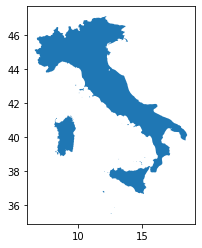

In [21]:
single_shape.plot()

In [22]:
if (pathlib.Path(local_path_geom).exists()):
    os.remove(local_path_geom)

In [23]:
single_shape.to_file(local_path_geom, driver='GeoJSON')

## <a id=2_Authentication></a> **Step 2: Authentication** 

The following lines of code will show the personal **Adam API-Key** of the user and the endpoint currently in use, that provides access to the products in the related catalogue. At the end of the execution, if the authentication process is successfull the personal token and the expiration time should be returned as outputs.

In [24]:
pip install adamapi

Note: you may need to restart the kernel to use updated packages.


In [25]:
adam_key = open(os.path.join(os.environ['HOME'],"adam-key")).read().rstrip()

In [26]:
import adamapi as adam
a = adam.Auth()

a.setKey(adam_key)
a.setAdamCore('https://reliance.adamplatform.eu')
a.authorize() 

{'expires_at': '2022-01-23T22:01:55.958Z',
 'access_token': 'aedd284ab8e847afa90c2a149649dd63',
 'refresh_token': '7e7c87c34a7a4aeda3acbbed899f3103',
 'expires_in': 3600}

## <a id=3_Datasets_Discovery></a> **Step 3: Datasets Discovery**

After authorization, the user can browse the whole catalogue, structured as a JSON object after a pagination process,  displaying all the available datasets. This operation can be executed with the <font color='blue'> **getDatasets()** </font> function without including any argument. Some lines of code should be added to parse the Json object and extract the names of the datasets.The Json object can be handled as a Python dictionary.

### Pre-filter datasets

We will discover all the available datasets in the ADAM platform but will only print elements of interest **EU_CAMS** e.g. [European air quality datasets](https://ads.atmosphere.copernicus.eu/cdsapp#!/dataset/cams-europe-air-quality-forecasts?tab=overview) from Copernicus Atmosphere Monitoring Service

In [27]:
def list_datasets(a, search="", dataset_name=""):
    datasets = adam.Datasets(a)
    catalogue = datasets.getDatasets()
    datasetID = None

# Extracting the size of the catalogue

    total = catalogue['properties']['totalResults']
    items = catalogue['properties']['itemsPerPage']
    pages = total // items
    
    print('\033[1;34m')
    print('----------------------------------------------------------------------')
    print( 'List of available datasets:')
    print ('\033[0;0m')

# Extracting the list of datasets across the whole catalogue

    for i in range(0, pages):
        page = datasets.getDatasets(page=i)
        for element in page['content']:
            if search == "" or search in element['title']:
                print(element['title'] + " --> datasetId = " + element['datasetId'])
                if element['title'] == dataset_name:
                    datasetID = element['datasetId']
    return datasets, datasetID

In [28]:
datasets, datasetID = list_datasets(a, search="EU_CAMS", dataset_name = 'EU_CAMS_SURFACE_' + variable_name + '_G')


----------------------------------------------------------------------
List of available datasets:

EU_CAMS_SURFACE_C2H3NO5_G --> datasetId = 69619:EU_CAMS_SURFACE_C2H3NO5_G
EU_CAMS_SURFACE_CO_G --> datasetId = 69620:EU_CAMS_SURFACE_CO_G
EU_CAMS_SURFACE_NH3_G --> datasetId = 69621:EU_CAMS_SURFACE_NH3_G
EU_CAMS_SURFACE_NMVOC_G --> datasetId = 69622:EU_CAMS_SURFACE_NMVOC_G
EU_CAMS_SURFACE_NO2_G --> datasetId = 69623:EU_CAMS_SURFACE_NO2_G
EU_CAMS_SURFACE_NO_G --> datasetId = 69624:EU_CAMS_SURFACE_NO_G
EU_CAMS_SURFACE_O3_G --> datasetId = 69625:EU_CAMS_SURFACE_O3_G
EU_CAMS_SURFACE_PM10_G --> datasetId = 69626:EU_CAMS_SURFACE_PM10_G
EU_CAMS_SURFACE_PM25_G --> datasetId = 69627:EU_CAMS_SURFACE_PM25_G
EU_CAMS_SURFACE_REC_G --> datasetId = 69628:EU_CAMS_SURFACE_REC_G
EU_CAMS_SURFACE_SIA_G --> datasetId = 69629:EU_CAMS_SURFACE_SIA_G
EU_CAMS_SURFACE_SO2_G --> datasetId = 69630:EU_CAMS_SURFACE_SO2_G
EU_CAMS_SURFACE_TEC_G --> datasetId = 69631:EU_CAMS_SURFACE_TEC_G


We are interested by one variable only so we will discover the corresponding dataset and print its metadata, showing the data provenance.

In [29]:
print('\033[1;34m' + 'Metadata of ' + datasetID + ':')
print ('\033[0;0m')

paged = datasets.getDatasets(datasetID)
for i in paged.items():
    print(str(i[0]) + ': ' + str(i[1]))

Metadata of 69623:EU_CAMS_SURFACE_NO2_G:

datasetId: 69623:EU_CAMS_SURFACE_NO2_G
creationDate: 2021-07-12T00:00:00Z
dataType: Float32
epsg: 4326
keywords: []
license: {'documentationUrl': '', 'dataProviderName': 'ADS', 'dataProviderUrl': '', 'licenseId': '', 'dataPolicy': '', 'doi': '', 'credits': ''}
maxValue: [1.354510459350422e-07]
minValue: [0.0]
numberOfRecords: 123782
profile: {'profileSchema': 'eo_profile_schema.json', 'name': 'Earth Observation', 'mission': 'CAMS', 'sensor': 'CAMS', 'processingLevel': 'forecast', 'instrument': '', 'platform': ''}
resolutionUnit: degree
temporalResolution: Hourly
unit: 
unitDescription: 
updateDate: 2022-01-23T12:07:34Z
geometry: {'type': 'Polygon', 'coordinates': [[[-25.000012, 29.999997], [44.999988, 29.999997], [44.999988, 71.999997], [-25.000012, 71.999997], [-25.000012, 29.999997]]]}
resolutions: [0.1]
anyText: 4326,ESA,Daily,ESA
applications: ['Atmosphere']
datasetManager: govoni@meeo.it
datasetManagerOrganisation: meeo
description: CAMS N

## <a id=4_Products_Discovery></a> **Step 4: Products Discovery**

The products discovery operation related to a specific dataset is implemented in the Adam API with the <font color='blue'> **getProducts()** </font> function. A combined **spatial and temporal search** can be requested by specifying the <font color='red'> **datasetId** </font> for the selected dataset, the <font color='red'> **geometry** </font> argument that specifies the <u>Area Of Interest</u>, and a temporal range defined by `startDate` and `endDate` . The geometry must **<u>always</u>** be defined by a <font color='red'> **GeoJson object** </font> that describes the polygon in the **<u>counterclockwise winding order**</u>. The optional arguments `startIndex` and `maxRecords` can set the list of the results returned as an output. The results of the search are displayed with their metadata and they are sorted starting from the most recent product.

### Search data

In [30]:
pip install geojson_rewind

Note: you may need to restart the kernel to use updated packages.


In [31]:
from geojson_rewind import rewind
import json

The GeoJson object needs to be rearranged according to the counterclockwise winding order. This operation is executed in the next few lines to obtain 
a geometry that meets the requirements of the method. **Geom_1** is the final result to be used in the discovery operation.

In [32]:
with open(local_path_geom) as f:
    geom_dict = json.load(f)
output = rewind(geom_dict)    
geom_1 = str(geom_dict['features'][0]['geometry'])

Copernicus air quality analyses are hourly product but when we select a given date, we will only get the first 10 products. 
Below, we make a list of the first 10 available products for the 1st September 2020 e.g. we restrict our search to this date.

In [33]:
start_date = '2019-09-01'
end_date = '2019-09-01'

In [34]:
search = adam.Search( a )
results = search.getProducts(
    datasetID, 
    geometry=geom_1,
    startDate=start_date,
    endDate=end_date
 )

# Printing the results

print('\033[1;34m' + 'List of available products (maximum 10 products printed):')
print ('\033[0;0m')

count = 1
for i in results['content']:
        print("\033[1;31;1m" + "#" + str(count))
        print ('\033[0m')
        for k in i.items():
            print(str(k[0]) + ': ' + str(k[1]))
        count = count+1
        print('------------------------------------')

List of available products (maximum 10 products printed):

#1

_id: {'$oid': '60efc2ae6dfebc080600365c'}
datasetId: EU_CAMS_SURFACE_NO2_G
productDate: 2019-09-01T23:00:00Z
productId: EU_CAMS_SURFACE_NO2_G_20190901230000.tif
geometry: {'geometries': [{'type': 'Polygon', 'coordinates': [[[-25.000012, 29.999997], [44.999988, 29.999997], [44.999988, 71.999997], [-25.000012, 71.999997], [-25.000012, 29.999997]]]}], 'type': 'GeometryCollection'}
insertDate: 2021-07-15T05:07:58Z
status: Online
------------------------------------
#2

_id: {'$oid': '60efc2ae6dfebc0806003658'}
datasetId: EU_CAMS_SURFACE_NO2_G
productDate: 2019-09-01T22:00:00Z
productId: EU_CAMS_SURFACE_NO2_G_20190901220000.tif
geometry: {'geometries': [{'type': 'Polygon', 'coordinates': [[[-25.000012, 29.999997], [44.999988, 29.999997], [44.999988, 71.999997], [-25.000012, 71.999997], [-25.000012, 29.999997]]]}], 'type': 'GeometryCollection'}
insertDate: 2021-07-15T05:07:58Z
status: Online
------------------------------------
#

## <a id=5_Data_Access></a> **Step 5: Data Access**

After the data discovery operation that retrieves the availability of products in the catalogue, it is possible to access the data with the <font color='blue'> **getData** </font> function. Each product in the output list intersects the selected geometry and the following example shows how to access a specific product from the list of results obtained in the previous step. While the <font color='red'> **datasetId** </font> is always a mandatory parameter, for each data access request the <font color='blue'> **getData** </font> function needs only one of the following arguments: <font color='red'> **geometry** </font> or <font color='red'> **productId** </font>, that is the value of the <font color='blue'> **_id** </font> field in each product metadata. In the case of a <u>**spatial and temporal search**</u> the geometry must be provided to the function, together with the time range of interest. 
The output of the <font color='blue'> **getData** </font> function is <u>always</u> a <font color='red'> **.zip** </font> file containing the data retrieved with the data access request, providing the spatial **subset** of the product. The zip file will contain a geotiff file for each of the spatial subsets extracted in the selected time range.

#### Define a function to select a time range and get data

In [35]:
def getZipData(auth, dataset_info):
    if not (pathlib.Path(pathlib.Path(dataset_info['outputFname']).stem).exists() or pathlib.Path(dataset_info['outputFname']).exists()):
        data=adam.GetData(auth)
        image = data.getData(
        datasetId = dataset_info['datasetID'],
        startDate = dataset_info['startDate'],
        endDate = dataset_info['endDate'],
        geometry = dataset_info['geometry'],
        outputFname = dataset_info['outputFname'])
        print(image)

#### Get variable of interest for each day of September 2019, 2020 and 2021 (time 00:00:00)

This process can take a bit of time so be patient!

In [36]:
import time
from IPython.display import clear_output

In [37]:
start = time.time()

for year in ['2019', '2020', '2021']:
    datasetInfo = {
    'datasetID' : datasetID,
    'startDate' : year + '-09-01',
    'endDate' : year + '-09-30',
    'geometry' : geom_1,
    'outputFname' : INPUT_DATA_DIR + '/' + variable_name + '_' + country_code + '_ADAMAPI_' + year + '.zip'
    }
    getZipData(a, datasetInfo)
    
end = time.time()
clear_output(wait=True)
delta1 = end - start
print('\033[1m'+'Processing time: ' + str(round(delta1,2)))

Processing time: 0.04


## <a id=6_Data_Analysis_Visualization></a> **Step 6: Data Analysis and Visualization**

The data retrieved via the Adam API is now available as a zip file that must be unzipped to directly handle the data in a geotiff format. Then with the Python packages provided in the Jupyter environment it is possible to process and visualized the requested product.

#### Unzip data

In [38]:
import zipfile

In [39]:
def unzipData(filename, out_prefix):
    with zipfile.ZipFile(filename, 'r') as zip_ref:
        zip_ref.extractall(path = os.path.join(out_prefix, pathlib.Path(filename).stem))

In [40]:
for year in ['2019', '2020', '2021']:
    filename = INPUT_DATA_DIR + '/' + variable_name + '_' + country_code + '_ADAMAPI_' + year + '.zip'
    target_file = pathlib.Path(os.path.join(INPUT_DATA_DIR, pathlib.Path(pathlib.Path(filename).stem)))
    if not target_file.exists():
        unzipData(filename, INPUT_DATA_DIR)

#### Read data and make a monthly average

In [41]:
import xarray as xr
import glob

We now read these files using `xarray`. First, we make a list of all the geotiff files in a given folder. To ensure each raster is labelled correctly with its time, we can use a helper function `paths_to_datetimeindex()` to extract time information from the file paths we obtained above. We then load and concatenate each dataset along the time dimension using `xarray.open_rasterio()`, convert the resulting `xarray.DataArray` to a `xarray.Dataset`, and give the variable a more useful name (**PM10**)

In [42]:
from datetime import datetime

In [43]:
def paths_to_datetimeindex(paths):
    return  [datetime.strptime(date.split('_')[-1].split('.')[0], '%Y-%m-%dt%f') for date in paths]

In [44]:
def getData(dirtif, variable):
    geotiff_list = glob.glob(dirtif)
    # Create variable used for time axis
    time_var = xr.Variable('time', paths_to_datetimeindex(geotiff_list))
    # Load in and concatenate all individual GeoTIFFs
    geotiffs_da = xr.concat([xr.open_rasterio(i, parse_coordinates=True) for i in geotiff_list],
                        dim=time_var)
    # Covert our xarray.DataArray into a xarray.Dataset
    geotiffs_da = geotiffs_da.to_dataset('band')
    # Rename the dimensions to make it CF-convention compliant
    geotiffs_da = geotiffs_da.rename_dims({'y': 'latitude', 'x':'longitude'})
    # Rename the variable to a more useful name
    geotiffs_da = geotiffs_da.rename_vars({1: variable, 'y':'latitude', 'x':'longitude'})

    return geotiffs_da

In [45]:
geotiff_ds = getData( INPUT_DATA_DIR + '/' + variable_name + '_'+ country_code + '_ADAMAPI_20*/*.tif', variable_name)
geotiff_ds[variable_name].attrs = {'units' : variable_unit, 'long_name' : variable_long_name }
geotiff_ds

<xarray.Dataset>
Dimensions:    (time: 90, latitude: 117, longitude: 120)
Coordinates:
  * latitude   (latitude) float64 47.05 46.95 46.85 46.75 ... 35.65 35.55 35.45
  * longitude  (longitude) float64 6.65 6.75 6.85 6.95 ... 18.35 18.45 18.55
  * time       (time) datetime64[ns] 2021-09-30 2021-09-29 ... 2019-09-01
Data variables:
    NO2        (time, latitude, longitude) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    transform:      (0.1, 0.0, 6.599987990701003, 0.0, -0.1, 47.09999699761336)
    crs:            +init=epsg:4326
    res:            (0.1, 0.1)
    is_tiled:       0
    nodatavals:     (0.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area

#### Analyze data

Make yearly average for the month of September

In [46]:
geotiff_dm = geotiff_ds.groupby('time.year').mean('time', keep_attrs=True)

In [47]:
geotiff_dm

<xarray.Dataset>
Dimensions:    (year: 3, latitude: 117, longitude: 120)
Coordinates:
  * latitude   (latitude) float64 47.05 46.95 46.85 46.75 ... 35.65 35.55 35.45
  * longitude  (longitude) float64 6.65 6.75 6.85 6.95 ... 18.35 18.45 18.55
  * year       (year) int64 2019 2020 2021
Data variables:
    NO2        (year, latitude, longitude) float32 0.0 0.0 0.0 ... 0.0 0.0 0.0
Attributes:
    transform:      (0.1, 0.0, 6.599987990701003, 0.0, -0.1, 47.09999699761336)
    crs:            +init=epsg:4326
    res:            (0.1, 0.1)
    is_tiled:       0
    nodatavals:     (0.0,)
    scales:         (1.0,)
    offsets:        (0.0,)
    AREA_OR_POINT:  Area

#### Visualize data

In [48]:
pip install cmaps

Note: you may need to restart the kernel to use updated packages.


In [49]:
import cartopy.crs as ccrs
import matplotlib.pyplot as plt
import cmaps

In [50]:
# To plot over Norway, taking a central longitude of 60 is fine. You may want to change it when plotting over different geographical areas
central_longitude = town_coordinates['latitude']

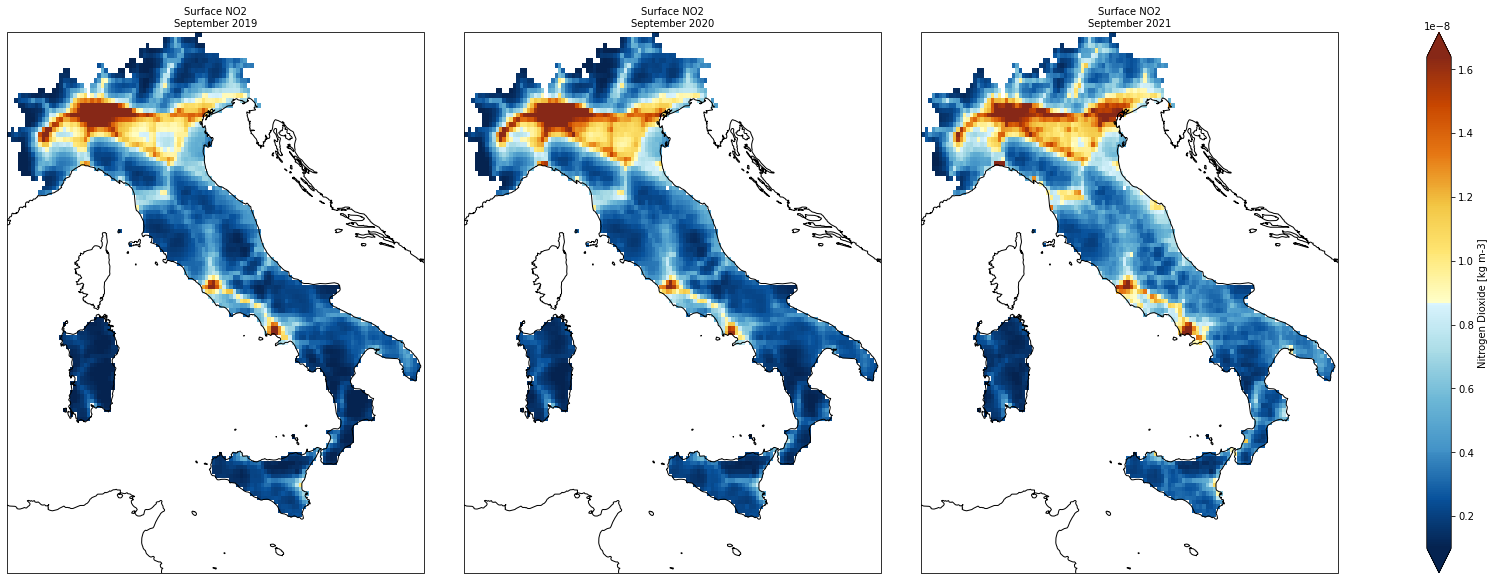

In [51]:
# generate figure
proj_plot = ccrs.Mercator(central_longitude=central_longitude)

lcmap = cmaps.BlueYellowRed
# Only plot values greater than 0
p = geotiff_dm[variable_name].where(geotiff_dm[variable_name] > 0).plot(x='longitude', y='latitude',
                                                                 transform=ccrs.PlateCarree(),
                                                                 subplot_kws={"projection": proj_plot},
                                                                 size=8,
                                                                 col='year', col_wrap=3, robust=True,
                                                                 cmap=lcmap, add_colorbar=True)

# We have to set the map's options on all four axes
for ax,i in zip(p.axes.flat,  geotiff_dm.year.values):
    ax.coastlines()
    ax.set_title('Surface ' + variable_name + '\n' + 'September ' + str(i), fontsize=10)

plot_file = os.path.join(OUTPUT_DATA_DIR, variable_name + '_september_' + country_code + '_2019-2021.png')
if os.path.exists(plot_file + '.bak'):
    os.remove(plot_file + '.bak')
if os.path.exists(plot_file):
    os.rename(plot_file, plot_file + '.bak') 
plt.savefig(plot_file)

#### Plot one single date

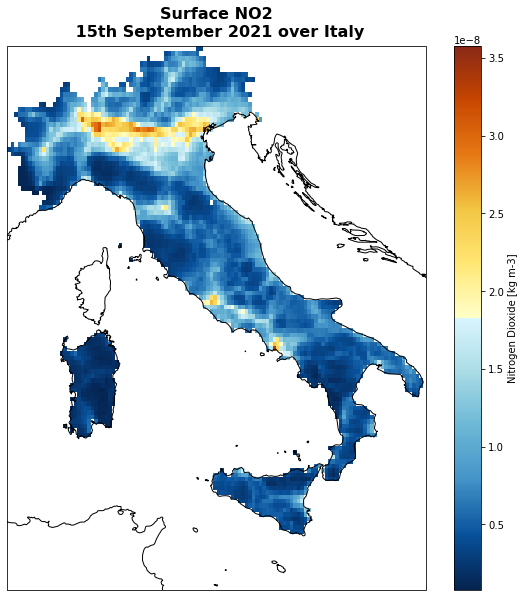

In [52]:
fig=plt.figure(figsize=(10,10))
# Define the projection
crs=ccrs.PlateCarree()

# We're using cartopy and are plotting in Orthographic projection 
# (see documentation on cartopy)
ax = plt.subplot(1, 1, 1, projection=ccrs.Mercator(central_longitude=central_longitude))
ax.coastlines(resolution='10m')

# custom colormap

lcmap = cmaps.BlueYellowRed

# We need to project our data to the new Mercator projection and for this we use `transform`.
# we set the original data projection in transform (here PlateCarree)
# we only plot values greather than 0
img = geotiff_ds[variable_name].where(geotiff_ds[variable_name] > 0).sel(time='2021-09-15').plot(ax=ax,
                                                                                                 transform=ccrs.PlateCarree(),
                                                                                                 cmap=lcmap)  

# Title for plot
plt.title('Surface ' + variable_name + '\n 15th September 2021 over ' + country_fullname,
          fontsize = 16, fontweight = 'bold', pad=10)

plot_file = os.path.join(OUTPUT_DATA_DIR, variable_name + '_september_' + country_code + '_2021-09-15.png')
if os.path.exists(plot_file + '.bak'):
    os.remove(plot_file + '.bak')
if os.path.exists(plot_file):
    os.rename(plot_file, plot_file + '.bak')  
plt.savefig(plot_file)

#### Interactive plot with bokeh

In [53]:
import holoviews as hv
import hvplot.xarray

<div align="center">
    <h1 style="font-size:5vw">Interactive plot from 1st September to 30th September 2021</h1>
</div>

In [54]:
geotiff_ds = geotiff_ds.sortby('time')

In [55]:
plot_start_time = '2021-09-01'
plot_end_time = '2021-09-30'
labels = geotiff_ds.hvplot.labels( text_font_size='6pt', text_color='blue').opts(xoffset=20)
map_hv = geotiff_ds.where(geotiff_ds[variable_name] > 0).sel(time=slice(plot_start_time, plot_end_time))[variable_name].hvplot(
    groupby="time",
    cmap=lcmap,
    geo=True,
    coastline='10m',
    frame_width=400,
    clim=(0,35) 
)
plot_file = os.path.join(OUTPUT_DATA_DIR, "interactive_map_" + plot_start_time + "_" + plot_end_time + ".html")
if os.path.exists(plot_file + '.bak'):
    os.remove(plot_file + '.bak')
if os.path.exists(plot_file):
    os.rename(plot_file, plot_file + '.bak') 
hv.save(map_hv, plot_file, backend="bokeh")

#### Save Data Cube selection into netCDF

In [56]:
output_file = os.path.join(OUTPUT_DATA_DIR, variable_name + "_september_" + country_code + "_2019-2021.nc")
if os.path.exists(output_file + '.bak'):
    os.remove(output_file + '.bak')
if os.path.exists(output_file):
    os.rename(output_file, output_file + '.bak') 
geotiff_ds.to_netcdf(output_file)

#### Plot a timeseries

<div align="center">
    <h1 style="font-size:5vw">Timeseries from 1st September to 30th September 2021</h1>
</div>

Sort times and then select one location

In [57]:
# You may change this location accordingly
location = town_fullname
latitude = town_coordinates['latitude']
longitude = town_coordinates['longitude']
plot_end_time = '2021-09-01'
plot_end_time = '2021-09-30'

In [58]:
ts = geotiff_ds[variable_name].where(geotiff_ds[variable_name] > 0). \
        sel(latitude=latitude, longitude=longitude, method='nearest'). \
        sel(time=slice(plot_start_time, plot_end_time))

In [59]:
ts_plot = ts.hvplot(color='purple') * ts.hvplot.scatter(marker='o', color='blue', size=15)

In [60]:
ts_plot

:Overlay
   .Curve.I   :Curve   [time]   (NO2)
   .Scatter.I :Scatter   [time]   (NO2)

In [61]:
plot_file = os.path.join(OUTPUT_DATA_DIR, "interactive_timeseries_" + location + "_" + plot_start_time + "_" + plot_end_time + ".html")
if os.path.exists(plot_file + '.bak'):
    os.remove(plot_file + '.bak')
if os.path.exists(plot_file):
    os.rename(plot_file, plot_file + '.bak') 
hv.save(ts_plot, plot_file, backend="bokeh")

#### Save timeseries into tabular (csv) file

In [62]:
output_file = os.path.join(OUTPUT_DATA_DIR, "timeseries_" + location + "_september2021.csv")
if os.path.exists(output_file + '.bak'):
    os.remove(output_file + '.bak')
if os.path.exists(output_file):
    os.rename(output_file, output_file + '.bak') 
ts.to_series().to_csv(output_file, sep='\t')

## <a id=7_rohub></a> **Step 7: Create Research Object and Share my work**

## Create Research Object in ROHUB

In [63]:
pip install rohub

Note: you may need to restart the kernel to use updated packages.


In [64]:
import os
import pathlib
from rohub import rohub, settings

#### Authenticating

- If the code cell below fails,  make sure you have created the two files:
    - `rohub-user`: contains your rohub username
    - `rohub-pwd`: contains your rohub password

In [65]:
rohub_user = open(os.path.join(os.environ['HOME'],"rohub-user")).read().rstrip()
rohub_pwd = open(os.path.join(os.environ['HOME'],"rohub-pwd")).read().rstrip()

In [66]:
rohub.login(username=rohub_user, password=rohub_pwd)

Logged successfully as annefou@geo.uio.no.


## Create a new Exectuable RO

In [67]:
ro_title = variable_name + ' in ' + country_fullname + " Jupyter notebook demonstrating the usage of CAMS European air quality analysis from Copernicus Atmosphere Monitoring with RELIANCE services" 
ro_research_areas = ["Earth sciences"]
ro_description = "This Research Object demonstrates how to use CAMS European air quality analysis from Copernicus Atmosphere Monitoring with RELIANCE services and compute monthly map of " + \
                 variable_name + "over a given geographical area, here " + country_fullname
ro = rohub.ros_create(title=ro_title, research_areas=ro_research_areas, 
                      description=ro_description, 
                      use_template=True,
                      ros_type="Executable Research Object")

Research Object was successfully created with id = b2b23c8f-3cf6-457b-8026-eb0bfd421a8e


## Show metadata

In [68]:
ro.show_metadata()

{'identifier': 'b2b23c8f-3cf6-457b-8026-eb0bfd421a8e',
 'shared_link': 'https://w3id.org/ro-id/b2b23c8f-3cf6-457b-8026-eb0bfd421a8e',
 'title': 'NO2 in Italy Jupyter notebook demonstrating the usage of CAMS European air quality analysis from Copernicus Atmosphere Monitoring with RELIANCE services',
 'description': 'This Research Object demonstrates how to use CAMS European air quality analysis from Copernicus Atmosphere Monitoring with RELIANCE services and compute monthly map of NO2over a given geographical area, here Italy',
 'status': 'LIVE',
 'access_mode': 'PUBLIC',
 'type': 'Executable Research Object',
 'template': 'Executable Research Object folders structure',
 'created': '2022-01-23T21:05:14.627591Z',
 'creator': 'annefou@geo.uio.no',
 'modificator': None,
 'modified': '2022-01-23T21:05:15.686886Z',
 'importer': None,
 'research_areas': ['Earth sciences'],
 'owner': 'annefou@geo.uio.no',
 'editors': [],
 'readers': [],
 'rating': '0.00',
 'number_of_ratings': 0,
 'number_of_l

## Add additional authors and/or contributors to our Research Object

In [69]:
ro.set_authors(agents=author_emails)

Agent: annefou@geo.uio.no recognized in the system.
Agent: jeani@uio.no recognized in the system.


[{'identifier': '62277187-0f2e-4320-a6b0-7fe467f1b1c1',
  'username': 'annefou@geo.uio.no',
  'name': 'annefou@geo.uio.no',
  'type': 'RohubUser',
  'display_name': 'Anne Fouilloux',
  'orcid_identifier': '0000-0002-1784-2920',
  'affiliation': 'Nordic e-Infrastructure Collaboration (NeIC)'},
 {'identifier': '1ac03644-c78c-4ca2-b0b4-2d9e40f671af',
  'username': 'jeani@uio.no',
  'name': 'jeani@uio.no',
  'type': 'ExternalUser',
  'display_name': 'Jean Iaquinta',
  'orcid_identifier': '0000-0002-8763-1643',
  'affiliation': 'UiO'}]

## Add publisher/copyright holder

- Use [Research Organization Registry (ROR)](https://ror.org/) to find the identifier of your organization

### Add publishers 

In [70]:
ro.set_publishers(agents=list_publishers)

Agent: {'org_id': 'http://www.uio.no/english/', 'display_name': 'University of Oslo', 'agent_type': 'organization', 'ror_identifier': '01xtthb56', 'organization_url': 'http://www.uio.no/english/'} recognized in the system.
Agent: {'org_id': 'https://neic.no/', 'display_name': 'Nordic e-Infrastructure Collaboration', 'agent_type': 'organization', 'ror_identifier': '04jcwf484', 'organization_url': 'https://neic.no/'} recognized in the system.


[{'identifier': '1d581e9d-25e2-4029-bdeb-6c055a0db8e4',
  'username': 'https://ror.org/01xtthb56',
  'name': 'https://ror.org/01xtthb56',
  'type': 'Organization',
  'display_name': 'University of Oslo'},
 {'identifier': 'fbd9bdcf-4a1d-4ae8-9a90-6b9ec5a3b8b2',
  'username': 'https://ror.org/04jcwf484',
  'name': 'https://ror.org/04jcwf484',
  'type': 'Organization',
  'display_name': 'Nordic e-Infrastructure Collaboration'}]

In [71]:
ro.set_copyright_holders(agents=list_copyright_holders)

Agent: {'org_id': 'http://www.uio.no/english/', 'display_name': 'University of Oslo', 'agent_type': 'organization', 'ror_identifier': '01xtthb56', 'organization_url': 'http://www.uio.no/english/'} recognized in the system.


[{'identifier': '1d581e9d-25e2-4029-bdeb-6c055a0db8e4',
  'username': 'https://ror.org/01xtthb56',
  'name': 'https://ror.org/01xtthb56',
  'type': 'Organization',
  'display_name': 'University of Oslo'}]

In [72]:
organizations = rohub.organizations_find()
organizations

,identifier,organization_id,display_name,email,url,ror_identifier
0,92459295-cc33-40a2-b2ca-e416ad73a95e,neworg_1@example.org,Example Org 1,neworg1@example.org,http://neworg1.example.org,abcd123
1,556f3671-87b4-4576-b39d-654942ef248e,neworg_2@example.org,Example Org 2,neworg2@example.org,http://neworg2.example.org,abcd123
2,fbd9bdcf-4a1d-4ae8-9a90-6b9ec5a3b8b2,https://ror.org/04jcwf484,Nordic e-Infrastructure Collaboration,None,https://neic.no/,04jcwf484
3,b1893a50-9f9b-49e8-8ab7-114152e29b9e,https://neic.no/,Nordic e-Infrastructure Collaboration,,https://neic.no/,04jcwf484
4,64ec5402-1171-42f6-b9dd-6fa901ca9724,https://ror.org/025cj6e44,Poznan Supercomputing and Networking Center,office@man.poznan.pl,https://www.psnc.pl/,025cj6e44
5,f8b4ad0c-a4b1-4595-81a0-dcf42db083d4,http://www.uio.no/english/,University of Oslo,,http://www.uio.no/english/,01xtthb56
6,1d581e9d-25e2-4029-bdeb-6c055a0db8e4,https://ror.org/01xtthb56,University of Oslo,None,http://www.uio.no/english/,01xtthb56


## Add RO Funding information

In [73]:
if funded_by:
    ro.add_funding(grant_identifier=funded_by["grant_id"], grant_name=funded_by["grant_Name"],
                   funder_name=funded_by["funder_name"], grant_title=funded_by["grant_title"],
                   funder_doi=funded_by["funder_doi"])

## Add RO license

In [74]:
ro.set_license(license_id=license) 

{'identifier': 'MIT',
 'title': 'MIT License',
 'description': 'MIT License',
 'created': '2016-09-12T02:51:35.895509+00:00',
 'updated': '2021-10-07T08:21:23.483114+00:00',
 'creator': None,
 'status': 'active',
 'url': 'https://opensource.org/licenses/MIT',
 'custom': False}

## Aggregate Resources

- We will be adding all the resources generated by our notebook (data and plots)
- Our data and plots can also be shared in B2DROP so we will get the shared link from B2DROP and add it to our research object

### List RO folders for this type of RO

In [75]:
myfolders = ro.list_folders()
myfolders

,identifier,name,description,creator,created_on,modified_on,path
0,f2f92574-e9ab-47b8-a54b-22490c4c603e,biblio,None,annefou@geo.uio.no,2022-01-23T21:05:16.048878+0000,2022-01-23T21:05:16.051903+0000,biblio
1,3a35bdd7-f701-463e-b9db-a57c6c9fa1ca,input,None,annefou@geo.uio.no,2022-01-23T21:05:16.049916+0000,2022-01-23T21:05:16.052195+0000,input
2,bfcd4994-3e5e-4aed-8bd0-e697c1caf4ff,output,None,annefou@geo.uio.no,2022-01-23T21:05:16.050115+0000,2022-01-23T21:05:16.052325+0000,output
3,58098fbc-6585-4382-8c76-357a724cb728,tool,None,annefou@geo.uio.no,2022-01-23T21:05:16.050255+0000,2022-01-23T21:05:16.052451+0000,tool


## Aggregate internal resources

### Add sketch to my RO

In [76]:
res_file_path = os.path.join(OUTPUT_DATA_DIR, variable_name + '_september_' + country_code + '_2019-2021.png')
res_res_type = "Sketch"
res_title = variable_long_name + " [" + variable_unit + "] over " + country_fullname + " for September 2019, 2020 and 2021"
res_description = "Monthly average maps of CAMS " + variable_long_name + " [" + variable_unit + "] over " + country_fullname + " in 2019, 2020 and 2021"
res_folder =  myfolders[myfolders['name'] == 'output'].iloc[0]['identifier']

ro.add_internal_resource(res_type=res_res_type, file_path=res_file_path, title=res_title, description=res_description, folder=res_folder)

Resource was successfully created with id = 2467d1f3-1fa4-4a9b-9b9c-62ee10dace1a


Resource(identifier=2467d1f3-1fa4-4a9b-9b9c-62ee10dace1a, post_request=False)

## Aggregate external resources

###  Get shared link from datahub
1. Retrieve your client identifier, client secret and refresh token from https://aai.egi.eu/fedcloud/
2. Create a new file in your HOME area for instance using nano (keep the `$` character in front of HOME; this is meant to be an environment variable):
```
nano $HOME/egi_fedcloud.cfg
```
3. Paste your client identifier, client secret and refresh token using the following syntax (do not forget `{` and `}` as well as comma `,` and columns `:`
```
{
"id": "XXXXXXXXXXXXXXXXX",
"secret": "YYYYYYYYYYYYYYYYYYYYYYYYYYYYYYY",
"token": "ffffffffffffffffffffffff"
}
```
4. You are ready to go. If you have issues, check first that the syntax is correct in your egi_fedcloud.cfg, that this file is located in the correct folder and then finally that your refresh token is still valid (check on https://aai.egi.eu/fedcloud/)

In [77]:
import os
import json
import requests
import datetime
import shutil

#### EGI Datahub functions to initialize EGI datahub and get shared link

In [78]:
def egi_datahub_init():
    egi_fedcloud_filename = os.path.join(os.environ['HOME'], 'egi_fedcloud.cfg')
    with open(egi_fedcloud_filename, 'r') as convert_file:
        tmp = convert_file.read()
        egi_fedcloud_auth = json.loads(tmp)
        try:
            # Retrieving an OIDC token from Check-in
            data = {
                'client_id': egi_fedcloud_auth['id'],
                'client_secret': egi_fedcloud_auth['secret'],
                'refresh_token': egi_fedcloud_auth['token'],
                'scope': 'openid email profile',
                'grant_type': 'refresh_token'
            }
            response = requests.post('https://aai.egi.eu/oidc/token', data=data, auth=(egi_fedcloud_auth['id'], 
                                                                                       egi_fedcloud_auth['secret']))
            #print(json.dumps(response.json(), indent=2))
            EGItoken = response.json()['access_token']
            headers = {
                'X-Auth-Token': f"egi:" + EGItoken,
                'Content-type': 'application/json',
            }
            # get current timestamp
            ts = datetime.datetime.now().timestamp()
            data = json.dumps({ 
                'name': 'REST and CDMI access token ' + str(ts), 
                'type': { 
                    'accessToken': {} 
                }, 
                'caveats': [ { 
                    'type': 'interface', 
                    'interface': 'rest' 
                }] 
            })

            response = requests.post('https://datahub.egi.eu/api/v3/onezone/user/tokens/named', headers=headers, data=data)
            DATAHUB_TOKEN = response.json()['token']
            return DATAHUB_TOKEN
        except:
            print("EGI Datahub Authentication problem: check your credentials")

In [79]:
def egi_datahub_getlink(datahub_token, filename):
    bname = os.path.basename(filename)
    datahub_remote_prefix = 'https://cesnet-oneprovider-01.datahub.egi.eu/api/v3/oneprovider/files/'
    hname = filename.split('datahub/')[1]
    datahub_location = os.path.join(datahub_remote_prefix, hname)
    print(datahub_location)
    headers = { 'X-Auth-Token': datahub_token }
    response = requests.get(datahub_location, headers=headers)
    dh_fileid = response.json()[0]['id']
    
    headers = { 'X-Auth-Token': datahub_token, 'Content-Type': 'application/json',}
    data = json.dumps({ 'name': bname,
    'fileId': dh_fileid
    })
    response = requests.post('https://cesnet-oneprovider-01.datahub.egi.eu/api/v3/oneprovider/shares', headers=headers, data=data)
    # print(json.dumps(response.json(), indent=2))
    shareIdGenerated=response.json()['shareId']
    
    headers = {'X-Auth-Token': datahub_token}
    response = requests.get('https://cesnet-oneprovider-01.datahub.egi.eu/api/v3/oneprovider/shares/'+shareIdGenerated, headers=headers) 
    # print(json.dumps(response.json(), indent=2))
    publicURL = response.json()['publicUrl']
    return publicURL

### EGI DataHub initialization 

In [80]:
DATAHUB_TOKEN = egi_datahub_init()

## Add inputs to my RO
- I used ADAM to retrieve relevant data but I will be sharing what I retrieved from the data cube so that my collaborators do not have to re-download the same input data again.

#### Geojson file used for rertieving data from ADAM data-cube

In [81]:
shared_input_path = os.path.join(INPUT_DATA_DIR, country_code.lower() + '.geo.json')
print(shared_input_path)
res_file_url = egi_datahub_getlink(DATAHUB_TOKEN, shared_input_path)
res_type = "Dataset"
res_title = "Geojson for " + country_fullname
res_description = "Geojson file used for retrieving data from the ADAM platform over " + country_fullname
res_folder = myfolders[myfolders['name'] == 'input'].iloc[0]['identifier']
ro.add_external_resource(res_type=res_type, input_url=res_file_url, title=res_title, description=res_description, folder=res_folder)

/home/jovyan/datahub/Reliance/Climate_IT_NO2/input/it.geo.json
https://cesnet-oneprovider-01.datahub.egi.eu/api/v3/oneprovider/files/Reliance/Climate_IT_NO2/input/it.geo.json
Resource was successfully created with id = 273c3f6f-f197-4aba-b03c-5c9baa246a95


Resource(identifier=273c3f6f-f197-4aba-b03c-5c9baa246a95, post_request=False)

#### Input data retrieved from ADAM data-cube

In [82]:
for year in ['2019', '2020', '2021']:
    shared_input_path = os.path.join(INPUT_DATA_DIR, variable_name + '_' + country_code + '_ADAMAPI_' + year + '.zip')
    print(shared_input_path)
    res_file_url = egi_datahub_getlink(DATAHUB_TOKEN, shared_input_path)
    res_type = "Data Cube Product"
    res_title = "Data-Cube from ADAM platform over " + country_fullname + " in September " + year
    res_description = "This dataset is a data-Cube retrieved from the ADAM platform over " + country_fullname + " in September " + year
    res_folder = myfolders[myfolders['name'] == 'input'].iloc[0]['identifier']
    ro.add_external_resource(res_type=res_type, input_url=res_file_url, title=res_title, description=res_description, folder=res_folder)

/home/jovyan/datahub/Reliance/Climate_IT_NO2/input/NO2_IT_ADAMAPI_2019.zip
https://cesnet-oneprovider-01.datahub.egi.eu/api/v3/oneprovider/files/Reliance/Climate_IT_NO2/input/NO2_IT_ADAMAPI_2019.zip
Resource was successfully created with id = 5cfaa415-2df8-42c6-b5d1-defad94c918d
/home/jovyan/datahub/Reliance/Climate_IT_NO2/input/NO2_IT_ADAMAPI_2020.zip
https://cesnet-oneprovider-01.datahub.egi.eu/api/v3/oneprovider/files/Reliance/Climate_IT_NO2/input/NO2_IT_ADAMAPI_2020.zip
Resource was successfully created with id = 19e63bfb-5032-403e-a869-27fa912b0ede
/home/jovyan/datahub/Reliance/Climate_IT_NO2/input/NO2_IT_ADAMAPI_2021.zip
https://cesnet-oneprovider-01.datahub.egi.eu/api/v3/oneprovider/files/Reliance/Climate_IT_NO2/input/NO2_IT_ADAMAPI_2021.zip
Resource was successfully created with id = f00284cc-2ac3-406d-8820-46dd04c0399a


### Add our Jupyter Notebook to our RO
- Make a copy of the current notebook to the tool folder for sharing as an external resource

In [83]:
notebook_filename = 'RELIANCE_' + country_fullname + '_' + variable_name + '.ipynb'
local_notebook_path = os.path.join('./', notebook_filename)
shared_notebook_path = os.path.join(TOOL_DATA_DIR, notebook_filename)

In [84]:
shared_notebook_path

'/home/jovyan/datahub/Reliance/Climate_IT_NO2/tool/RELIANCE_Italy_NO2.ipynb'

#### Copy current notebook to shared datahub 

In [85]:
bkfile = shared_notebook_path + '.bak'
if os.path.exists(bkfile):
    os.remove(bkfile)
if os.path.exists(shared_notebook_path):
    os.rename(shared_notebook_path, bkfile)
shutil.copy2(local_notebook_path, shared_notebook_path)

'/home/jovyan/datahub/Reliance/Climate_IT_NO2/tool/RELIANCE_Italy_NO2.ipynb'

### Create a shared link for my Jupyter Notebook

#### Get public URL from EGI Datahub to share link in RO 

In [86]:
res_file_url = egi_datahub_getlink(DATAHUB_TOKEN, shared_notebook_path)
res_type = "Jupyter Notebook"
res_title = "Jupyter Notebook of CAMS European air quality analysis from Copernicus Atmosphere Monitoring with RELIANCE services - Applied over " + country_fullname + " and variable " + variable_long_name
res_description = "Jupyter Notebook for discovering, accessing and processing RELIANCE data cube, and creating a Research Object with results, and finally publish it in Zenodo"
res_folder = myfolders[myfolders['name'] == 'tool'].iloc[0]['identifier']
ro.add_external_resource(res_type=res_type, input_url=res_file_url, title=res_title, description=res_description, folder=res_folder)

https://cesnet-oneprovider-01.datahub.egi.eu/api/v3/oneprovider/files/Reliance/Climate_IT_NO2/tool/RELIANCE_Italy_NO2.ipynb
Resource was successfully created with id = 369cab22-e0f7-4f65-94e4-6c300d60c48a


Resource(identifier=369cab22-e0f7-4f65-94e4-6c300d60c48a, post_request=False)

#### Add first plot as Image to my Research Object (external resource from EGI Datahub)

In [87]:
shared_plot_path = os.path.join(OUTPUT_DATA_DIR, variable_name + '_september_' + country_code + '_2019-2021.png')
print(shared_plot_path)
res_file_url = egi_datahub_getlink(DATAHUB_TOKEN, shared_plot_path)
res_type = "Image"
res_title = variable_long_name + " [" + variable_unit + "] over " + country_fullname + " for September 2019, 2020 and 2021"
res_description = "Monthly average maps of CAMS " + variable_long_name + " [" + variable_unit + "] over " + country_fullname + " in 2019, 2020 and 2021"
res_folder = myfolders[myfolders['name'] == 'output'].iloc[0]['identifier']
ro.add_external_resource(res_type=res_type, input_url=res_file_url, title=res_title, description=res_description, folder=res_folder)

/home/jovyan/datahub/Reliance/Climate_IT_NO2/output/NO2_september_IT_2019-2021.png
https://cesnet-oneprovider-01.datahub.egi.eu/api/v3/oneprovider/files/Reliance/Climate_IT_NO2/output/NO2_september_IT_2019-2021.png
Resource was successfully created with id = 842111b8-e3c0-4ad2-a354-91820b94c857


Resource(identifier=842111b8-e3c0-4ad2-a354-91820b94c857, post_request=False)

#### Add second plot as Image to my Research Object (external resource from EGI Datahub)

In [88]:
shared_plot_path = os.path.join(OUTPUT_DATA_DIR, variable_name + '_september_' + country_code + '_2021-09-15.png')
res_file_url = egi_datahub_getlink(DATAHUB_TOKEN, shared_plot_path)
res_type = "Image"
res_title = variable_long_name + " [" + variable_unit + "] over " + country_fullname + " on September 15, 2021"
res_description="Daily average maps of CAMS " + variable_long_name + variable_unit + "] over " + country_fullname + " on September 15, 2021"
ro.add_external_resource(res_type=res_type, input_url=res_file_url, title=res_title, description=res_description, folder=res_folder)

https://cesnet-oneprovider-01.datahub.egi.eu/api/v3/oneprovider/files/Reliance/Climate_IT_NO2/output/NO2_september_IT_2021-09-15.png
Resource was successfully created with id = a69e1247-a4ea-4be4-9568-ff7970817180


Resource(identifier=a69e1247-a4ea-4be4-9568-ff7970817180, post_request=False)

#### Add timeseries for the town (external resource from EGI Datahub)

In [89]:
shared_plot_path = os.path.join(OUTPUT_DATA_DIR, 'timeseries_' + town_fullname + '_september2021.csv')
res_file_url = egi_datahub_getlink(DATAHUB_TOKEN, shared_plot_path)
res_type="Result"
res_title="Timeseries of " + variable_long_name + " [" + variable_unit + "] over " + town_fullname + " in september 2021"
res_description="Daily average of CAMS " + variable_long_name + variable_unit + "] over " + town_fullname + " in September 2021"
ro.add_external_resource(res_type=res_type, input_url=res_file_url, title=res_title, description=res_description, folder=res_folder)

https://cesnet-oneprovider-01.datahub.egi.eu/api/v3/oneprovider/files/Reliance/Climate_IT_NO2/output/timeseries_Venice_september2021.csv
Resource was successfully created with id = 3c76b750-de51-44d2-88fb-5fd5f90e37df


Resource(identifier=3c76b750-de51-44d2-88fb-5fd5f90e37df, post_request=False)

#### Add netCDF file corresponding to Data cube selection (external resource from EGI Datahub)

In [90]:
shared_plot_path = os.path.join(OUTPUT_DATA_DIR, variable_name + '_september_' + country_code + '_2019-2021.nc')
res_file_url = egi_datahub_getlink(DATAHUB_TOKEN, shared_plot_path)
res_type="Result"
res_title="netCDF data for daily " + variable_name + "over " + country_fullname + " in September 2019, 2020 and 2021"
res_description="netCDF data corresponding to daily average of CAMS " + variable_long_name + " [" + variable_unit + "] over " + country_fullname + " for September 2019, September 2020 and September 2021"
ro.add_external_resource(res_type=res_type, input_url=res_file_url, title=res_title, description=res_description, folder=res_folder)

https://cesnet-oneprovider-01.datahub.egi.eu/api/v3/oneprovider/files/Reliance/Climate_IT_NO2/output/NO2_september_IT_2019-2021.nc
Resource was successfully created with id = a58709fe-e492-475b-80d8-98ddf9901182


Resource(identifier=a58709fe-e492-475b-80d8-98ddf9901182, post_request=False)

## Additional metadata for the RO

### Add geolocation to my Research Object
- We need to transform our geojson file into geojson-ld

In [91]:
from geojson_rewind import rewind
import json

In [92]:
geojson_ld_file = os.path.join(INPUT_DATA_DIR, country_code.lower() + '.geo-ld.json')
bkfile = geojson_ld_file + '.bak'
if os.path.exists(bkfile):
    os.remove(bkfile)
if os.path.exists(geojson_ld_file):
    os.rename(geojson_ld_file, bkfile)
shutil.copy2(os.path.join(INPUT_DATA_DIR, country_code.lower() + '.geo.json'), geojson_ld_file)

with open(geojson_ld_file , 'r+') as f:
    data = json.load(f)
    output = rewind(data)
    output['@context'] = { "geojson": "https://purl.org/geojson/vocab#" } 
    f.seek(0)        
    json.dump(output, f, indent=None)
    f.truncate()

In [93]:
geolocation_file_path = os.path.join(INPUT_DATA_DIR, country_code.lower() + '.geo.json')
ro.add_geolocation(body_specification_json=geolocation_file_path)

[{'identifier': 'c537ac44-5f3d-41f9-b7da-3946777052a8',
  'shared_link': 'https://w3id.org/ro-id/b2b23c8f-3cf6-457b-8026-eb0bfd421a8e/annotations/c537ac44-5f3d-41f9-b7da-3946777052a8',
  'name': 'annotations/c537ac44-5f3d-41f9-b7da-3946777052a8',
  'filename': '.ro/annotations/c537ac44-5f3d-41f9-b7da-3946777052a8.ttl',
  'relation': False,
  'read_only': False,
  'target': 'b2b23c8f-3cf6-457b-8026-eb0bfd421a8e',
  'ro': 'b2b23c8f-3cf6-457b-8026-eb0bfd421a8e',
  'resources': [],
  'created': '2022-01-23T21:06:05.062842+0000',
  'creator': 'annefou@geo.uio.no',
  'modificator': None,
  'modified': '2022-01-23T21:06:05.062724+0000',
  'authors_credits': ['annefou@geo.uio.no'],
  'contributors_credits': [],
  'api_link': 'https://api.rohub.org/api/annotations/c537ac44-5f3d-41f9-b7da-3946777052a8/'}]

### Export to RO-crate

In [94]:
ro.export_to_rocrate(filename="climate_EU-CAMS_" + country_code + "_" + variable_name + "_ro-crate", use_format="zip")

File was successfully downloaded.


### Take a snapshot of my RO

In [95]:
#snapshot_id=ro.snapshot()

### Archive and publish to Zenodo, optionally assign DOI 

In [96]:
snapshot_title="Jupyter Notebook Analysing the Air quality during Covid-19 pandemic using Copernicus Atmosphere Monitoring Service - Applied over " + country_fullname + " with " + variable_long_name
#snapshot_id_pub=ro.snapshot(title=snapshot_title, create_doi=True, publication_services=["Zenodo"])
#snapshot_id_pub

### Load the published Research Object

In [97]:
#published_ro = rohub.ros_load(identifier=snapshot_id)

### Show the DOI and get the link

In [98]:
#published_ro.show_publication()

### Fork and reuse existing RO to create derivative work

In [99]:
#fork_id=ro.fork(title="Forked Jupyter Notebook to analyze  the Air quality during Covid-19 pandemic using Copernicus Atmosphere Monitoring Service")
#forked_ro = rohub.ros_load(identifier=fork_id)
#forked_ro.show_metadata()